# Feature Engineering for IPL Data

This notebook will help you explore the aggregated IPL match data and create new features for analysis and modeling.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

c:\Users\admn\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Load Aggregated Data

Load the aggregated match data from the CSV file.

In [2]:
# Load the aggregated match data
file_path = 'match_data_with_run_rates.csv'
aggregated_data = pd.read_csv(file_path)

# Display the first few rows of the data
aggregated_data.head()

,match_id,innings_num,batting_team,over_number,ball_number,runs_scored,boundaries,dot_balls,wickets,extras,favored_team,win_percentage,striker_batsman,winner,toss_winner,toss_decision,batsman1_name,batsman1_runs,batsman1_balls_faced,batsman1_fours,batsman1_sixes,batsman2_name,batsman2_runs,batsman2_balls_faced,batsman2_fours,batsman2_sixes,bowler1_name,bowler1_overs_bowled,bowler1_maidens_bowled,bowler1_runs_conceded,bowler1_wickets_taken,bowler2_name,bowler2_overs_bowled,bowler2_maidens_bowled,bowler2_runs_conceded,bowler2_wickets_taken,venue,matches_played,average_runs_per_wicket,average_runs_per_over,batsman1_historical_average,batsman1_historical_strike_rate,batsman2_historical_average,batsman2_historical_strike_rate,bowler1_historical_average,bowler1_historical_economy,bowler1_historical_strike_rate,bowler2_historical_average,bowler2_historical_economy,bowler2_historical_strike_rate,bowler1_historical_average_corrected,bowler1_historical_economy_corrected,bowler1_historical_strike_rate_corrected,bowler2_historical_average_corrected,bowler2_historical_economy_corrected,bowler2_historical_strike_rate_corrected,batsman1_historical_average_corrected,batsman1_historical_strike_rate_corrected,batsman2_historical_average_corrected,batsman2_historical_strike_rate_corrected,current_run_rate,required_run_rate,projected_score,runs_in_over,is_wicket,is_four,is_six,total_score,total_wickets,powerplay,middle_overs,death_overs,pressure_index
0,1359475,1.0,CSK,0,0.1,0.0,0.0,1.0,0.0,0.0,NaN,NaN,Conway,GT,Gujarat Titans,field first,Devon Conway,0.0,1.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Shami,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,48.63,141.28,0.00,0.00,26.86,8.43,19.1,0.0,0.0,0.0,True,True,True,False,False,False,True,True,False,False,0.0,NaN,0.0,0.0,False,False,False,0.0,0.0,1,0,0,0.0
1,1359475,1.0,CSK,0,0.2,1.0,0.0,0.0,0.0,1.0,NaN,NaN,Conway,GT,Gujarat Titans,field first,Devon Conway,1.0,2.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Shami,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,48.63,141.28,0.00,0.00,26.86,8.43,19.1,0.0,0.0,0.0,True,True,True,False,False,False,True,True,False,False,3.0,NaN,60.0,1.0,False,False,False,1.0,0.0,1,0,0,0.0
2,1359475,1.0,CSK,0,0.3,0.0,0.0,1.0,0.0,0.0,NaN,NaN,Gaikwad,GT,Gujarat Titans,field first,Devon Conway,1.0,2.0,0.0,0.0,Ruturaj Gaikwad,0.0,1.0,0.0,0.0,Shami,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,48.63,141.28,41.75,136.86,26.86,8.43,19.1,0.0,0.0,0.0,True,True,True,False,False,False,False,False,False,False,2.0,NaN,40.0,0.0,False,False,False,1.0,0.0,1,0,0,0.0
3,1359475,1.0,CSK,0,0.4,1.0,0.0,0.0,0.0,0.0,NaN,NaN,Gaikwad,GT,Gujarat Titans,field first,Devon Conway,1.0,2.0,0.0,0.0,Ruturaj Gaikwad,1.0,2.0,0.0,0.0,Shami,0.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,48.63,141.28,41.75,136.86,26.86,8.43,19.1,0.0,0.0,0.0,True,True,True,False,False,False,False,False,False,False,3.0,NaN,60.0,1.0,False,False,False,2.0,0.0,1,0,0,0.0
4,1359475,1.0,CSK,0,0.5,0.0,0.0,1.0,0.0,0.0,NaN,NaN,Conway,GT,Gujarat Titans,field first,Devon Conway,1.0,3.0,0.0,0.0,Ruturaj Gaikwad,1.0,2.0,0.0,0.0,Shami,0.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,48.63,141.28,41.75,136.86,26.86,8.43,19.1,0.0,0.0,0.0,True,True,True,False,False,False,False,False,False,False,2.4,NaN,48.0,0.0,False,False,False,2.0,0.0,1,0,0,0.0


In [3]:
# Define the function directly in the notebook
def fill_missing_venue_data(df):
    """
    Fills missing venue information and stats within each match_id group.
    """
    # Check if match_id column exists
    if 'match_id' not in df.columns:
        print("Warning: 'match_id' column not found in DataFrame. Skipping venue fill operation.")
        return df

    # Copy the DataFrame to avoid modifying the original
    df_filled = df.copy()
    
    # Columns to fill
    cols_to_fill = ['venue', 'matches_played', 'average_runs_per_wicket', 'average_runs_per_over']
    
    # Filter columns that actually exist in the DataFrame
    cols_to_fill = [col for col in cols_to_fill if col in df_filled.columns]
    
    if not cols_to_fill:
        print("Warning: None of the venue columns found in DataFrame.")
        return df
        
    # Group by 'match_id' and apply forward fill and backward fill
    for col in cols_to_fill:
        df_filled[col] = df_filled.groupby('match_id')[col].ffill()
        df_filled[col] = df_filled.groupby('match_id')[col].bfill()
    
    print(f"Successfully filled missing values in columns: {cols_to_fill}")

    # save the filled data to a new csv file
    df_filled.to_csv('aggregated_match_data_filled.csv', index
                    =False)
    
    return df_filled

In [4]:

# Create a copy of the DataFrame
df_copy = aggregated_data.copy()

# Apply the locally defined function to the copied DataFrame
df_copy = fill_missing_venue_data(df_copy)

# Now df_copy contains the modified data, and the original 'aggregated_data' DataFrame is unchanged.
# You can perform your feature engineering steps on df_copy.

# Display the first few rows of the modified DataFrame to verify
print(df_copy.head())

# Check for null values in the relevant columns to confirm the function worked
print(df_copy[['venue', 'matches_played', 'average_runs_per_wicket', 'average_runs_per_over']].isnull().sum())

Successfully filled missing values in columns: ['venue', 'matches_played', 'average_runs_per_wicket', 'average_runs_per_over']
   match_id  innings_num batting_team  over_number  ball_number  runs_scored  \
0   1359475          1.0          CSK            0          0.1          0.0   
1   1359475          1.0          CSK            0          0.2          1.0   
2   1359475          1.0          CSK            0          0.3          0.0   
3   1359475          1.0          CSK            0          0.4          1.0   
4   1359475          1.0          CSK            0          0.5          0.0   

   boundaries  dot_balls  wickets  extras favored_team  win_percentage  \
0         0.0        1.0      0.0     0.0          NaN             NaN   
1         0.0        0.0      0.0     1.0          NaN             NaN   
2         0.0        1.0      0.0     0.0          NaN             NaN   
3         0.0        0.0      0.0     0.0          NaN             NaN   
4         0.0        1

## Data Exploration

Explore the data to understand its structure and identify potential features.

In [5]:
# Display basic information about the data
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28582 entries, 0 to 28581
Data columns (total 73 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   match_id                                   28582 non-null  int64  
 1   innings_num                                28582 non-null  float64
 2   batting_team                               28582 non-null  object 
 3   over_number                                28582 non-null  int64  
 4   ball_number                                28582 non-null  float64
 5   runs_scored                                28311 non-null  float64
 6   boundaries                                 28311 non-null  float64
 7   dot_balls                                  28311 non-null  float64
 8   wickets                                    28311 non-null  float64
 9   extras                                     28311 non-null  float64
 10  favored_team          

In [6]:
# Display summary statistics
df_copy.describe()

,match_id,innings_num,over_number,ball_number,runs_scored,boundaries,dot_balls,wickets,extras,win_percentage,batsman1_runs,batsman1_balls_faced,batsman1_fours,batsman1_sixes,batsman2_runs,batsman2_balls_faced,batsman2_fours,batsman2_sixes,bowler1_overs_bowled,bowler1_maidens_bowled,bowler1_runs_conceded,bowler1_wickets_taken,bowler2_overs_bowled,bowler2_maidens_bowled,bowler2_runs_conceded,bowler2_wickets_taken,matches_played,average_runs_per_wicket,average_runs_per_over,batsman1_historical_average,batsman1_historical_strike_rate,batsman2_historical_average,batsman2_historical_strike_rate,bowler1_historical_average,bowler1_historical_economy,bowler1_historical_strike_rate,bowler2_historical_average,bowler2_historical_economy,bowler2_historical_strike_rate,current_run_rate,required_run_rate,projected_score,runs_in_over,total_score,total_wickets,powerplay,middle_overs,death_overs,pressure_index
count,2.858200e+04,28582.000000,28582.000000,28582.000000,28311.000000,28311.000000,28311.000000,28311.000000,28311.000000,27109.000000,28311.000000,28311.000000,28311.000000,28311.000000,28311.000000,28311.000000,28311.000000,28311.000000,28311.000000,28311.000000,28311.000000,28311.000000,28311.000000,28311.000000,28311.000000,28311.000000,28080.000000,28080.000000,28080.000000,28556.000000,28567.000000,28465.000000,28578.000000,28262.000000,28543.000000,28360.000000,28287.000000,28541.000000,28381.000000,28262.000000,13692.000000,28262.000000,28311.000000,28311.000000,28311.000000,28582.000000,28582.000000,28582.000000,28460.000000
mean,1.396636e+06,1.486880,9.424568,9.601935,1.493695,0.196037,0.266257,0.049274,0.060612,76.426504,27.495426,17.538201,2.586274,1.080393,11.446611,7.609339,1.031507,0.469040,1.425736,0.007877,15.700293,0.532479,2.064109,0.010420,17.712444,0.596447,113.634330,25.192988,8.033095,30.984323,139.472918,24.488048,123.200799,28.417502,8.115506,19.901305,26.912756,7.647304,18.919273,8.669311,11.305104,173.383660,1.493695,88.055879,2.593974,0.303653,0.504058,0.192289,1.466033
std,3.225872e+04,0.499837,5.753107,5.753508,1.752856,0.397004,0.442008,0.216444,0.238622,16.123940,22.187889,12.389172,2.466354,1.516179,13.971461,7.664723,1.573984,0.980139,1.139410,0.088403,11.522374,0.786182,1.127396,0.101547,11.772784,0.822897,51.848529,1.575371,0.347807,9.052883,22.854983,12.182632,48.000946,11.749295,2.282232,7.829227,13.175373,2.869351,8.882643,2.649338,6.118168,52.988172,1.752856,55.462908,2.142864,0.459842,0.499992,0.394106,1.899846
min,1.359475e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,20.620000,7.380000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.359520e+06,1.000000,4.000000,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,61.480000,10.000000,8.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,1.000000,0.000000,9.000000,0.000000,67.000000,24.940000,7.830000,25.140000,131.970000,19.230000,127.470000,24.660000,7.720000,17.200000,23.320000,7.560000,17.000000,7.330000,8.200000,147.000000,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.422126e+06,1.000000,9.000000,9.500000,1.000000,0.000000,0.000000,0.000000,0.000000,76.620000,22.000000,15.000000,2.000000,0.000000,6.000000,5.000000,0.000000,0.000000,1.000000,0.000000,14.000000,0.000000,2.000000,0.000000,16.000000,0.000000,127.000000,25.260000,8.140000,30.790000,137.120000,25.710000,136.860000,28.540000,8.510000,20.000000,27.450000,8.430000,19.900000,8.670000,10.350000,173.000000,1.000000,84.000000,2.000000,0.000000,1.000000,0.000000,0.000000
75%,1.426276e+06,2.000000,14.000000,14.500000,2.000000,0.000000,1.000000,0.000000,0.000000,91.940000,40.000000,25.000000,4.000

## Feature Engineering

Create new features based on the existing data.

### Rolling Averages

Calculate rolling averages for runs, wickets, and other relevant metrics over different time windows.

In [7]:
# Define the columns for which you want to calculate rolling averages
#columns_to_roll = ['runs_scored', 'wickets', 'batsman1_runs', 'batsman2_runs', 'bowler1_runs_conceded', 'bowler2_runs_conceded']
columns_to_roll = ['runs_scored', 'wickets']

# First ensure data is properly sorted
df_copy = df_copy.sort_values(['match_id', 'innings_num', 'over_number', 'ball_number'])

# Aggregate stats by over
over_aggregates = df_copy.groupby(['match_id', 'innings_num', 'over_number'])[columns_to_roll].sum().reset_index()

# Calculate 5-over rolling averages
for col in columns_to_roll:
    over_aggregates[f'{col}_over_rolling_avg'] = over_aggregates.groupby(['match_id', 'innings_num'])[col].transform(
        lambda x: x.rolling(window=3, min_periods=1).mean()
    )

# Merge back to original ball-by-ball data
merge_cols = ['match_id', 'innings_num', 'over_number']
df_copy = df_copy.merge(
    over_aggregates[merge_cols + [f'{col}_over_rolling_avg' for col in columns_to_roll]],
    on=merge_cols, 
    how='left',
    suffixes=('', '_dup')
)

# Drop duplicate columns
cols_to_drop = [col for col in df_copy.columns if col.endswith('_dup') or col.endswith('_x') or col.endswith('_y')]
df_copy.drop(columns=cols_to_drop, inplace=True)

# Save the data to a new CSV file
df_copy.to_csv('aggregated_match_data_rolling_avg.csv', index=False)

# Display the first 20 rows to verify
df_copy.head(20)



,match_id,innings_num,batting_team,over_number,ball_number,runs_scored,boundaries,dot_balls,wickets,extras,favored_team,win_percentage,striker_batsman,winner,toss_winner,toss_decision,batsman1_name,batsman1_runs,batsman1_balls_faced,batsman1_fours,batsman1_sixes,batsman2_name,batsman2_runs,batsman2_balls_faced,batsman2_fours,batsman2_sixes,bowler1_name,bowler1_overs_bowled,bowler1_maidens_bowled,bowler1_runs_conceded,bowler1_wickets_taken,bowler2_name,bowler2_overs_bowled,bowler2_maidens_bowled,bowler2_runs_conceded,bowler2_wickets_taken,venue,matches_played,average_runs_per_wicket,average_runs_per_over,batsman1_historical_average,batsman1_historical_strike_rate,batsman2_historical_average,batsman2_historical_strike_rate,bowler1_historical_average,bowler1_historical_economy,bowler1_historical_strike_rate,bowler2_historical_average,bowler2_historical_economy,bowler2_historical_strike_rate,bowler1_historical_average_corrected,bowler1_historical_economy_corrected,bowler1_historical_strike_rate_corrected,bowler2_historical_average_corrected,bowler2_historical_economy_corrected,bowler2_historical_strike_rate_corrected,batsman1_historical_average_corrected,batsman1_historical_strike_rate_corrected,batsman2_historical_average_corrected,batsman2_historical_strike_rate_corrected,current_run_rate,required_run_rate,projected_score,runs_in_over,is_wicket,is_four,is_six,total_score,total_wickets,powerplay,middle_overs,death_overs,pressure_index,runs_scored_over_rolling_avg,wickets_over_rolling_avg
0,1359475,1.0,CSK,0,0.1,0.0,0.0,1.0,0.0,0.0,NaN,NaN,Conway,GT,Gujarat Titans,field first,Devon Conway,0.0,1.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Shami,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,"Narendra Modi Stadium, Ahmedabad",67.0,25.84,8.28,48.63,141.28,0.00,0.00,26.86,8.43,19.1,0.00,0.00,0.0,True,True,True,False,False,False,True,True,False,False,0.00,NaN,0.0,0.0,False,False,False,0.0,0.0,1,0,0,0.0,2.000000,0.000000
1,1359475,1.0,CSK,0,0.2,1.0,0.0,0.0,0.0,1.0,NaN,NaN,Conway,GT,Gujarat Titans,field first,Devon Conway,1.0,2.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Shami,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,"Narendra Modi Stadium, Ahmedabad",67.0,25.84,8.28,48.63,141.28,0.00,0.00,26.86,8.43,19.1,0.00,0.00,0.0,True,True,True,False,False,False,True,True,False,False,3.00,NaN,60.0,1.0,False,False,False,1.0,0.0,1,0,0,0.0,2.000000,0.000000
2,1359475,1.0,CSK,0,0.3,0.0,0.0,1.0,0.0,0.0,NaN,NaN,Gaikwad,GT,Gujarat Titans,field first,Devon Conway,1.0,2.0,0.0,0.0,Ruturaj Gaikwad,0.0,1.0,0.0,0.0,Shami,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,"Narendra Modi Stadium, Ahmedabad",67.0,25.84,8.28,48.63,141.28,41.75,136.86,26.86,8.43,19.1,0.00,0.00,0.0,True,True,True,False,False,False,False,False,False,False,2.00,NaN,40.0,0.0,False,False,False,1.0,0.0,1,0,0,0.0,2.000000,0.000000
3,1359475,1.0,CSK,0,0.4,1.0,0.0,0.0,0.0,0.0,NaN,NaN,Gaikwad,GT,Gujarat Titans,field first,Devon Conway,1.0,2.0,0.0,0.0,Ruturaj Gaikwad,1.0,2.0,0.0,0.0,Shami,0.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,0.0,"Narendra Modi Stadium, Ahmedabad",67.0,25.84,8.28,48.63,141.28,41.75,136.86,26.86,8.43,19.1,0.00,0.00,0.0,True,True,True,False,False,False,False,False,False,False,3.00,NaN,60.0,1.0,False,False,False,2.0,0.0,1,0,0,0.0,2.000000,0.000000
4,1359475,1.0,CSK,0,0.5,0.0,0.0,1.0,0.0,0.0,NaN,NaN,Conway,GT,Gujarat Titans,field first,Devon Conway,1.0,3.0,0.0,0.0,Ruturaj Gaikwad,1.0,2.0,0.0,0.0,Shami,0.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,0.0,"Narendra Modi Stadium, Ahmedabad",67.0,25.84,8.28,48.63,141.28,41.75,136.86,26.86,8.43,19.1,0.00,0.00,0.0,True,True,True,False,False,False,False,False,False,False,2.40,NaN,48.0,0.0,False,False,False,2.0,0.0,1,0,0,0.0,2.000000,0.000000
5,1359475,1.0,CSK,0,0.6,0.0,0.0,1.0,0.0,0.0,NaN,NaN,Conway,GT,Gujarat Titans,field first,Devon Conway,1.0,4.0,0.0,0.0,Ruturaj Gaikwad,1.0,2.0,0.0,0.0,Shami,1.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,0.0,"Narendra Modi Stadium, Ahmedabad",67.0,25.84,8.28,48.63,141.28,41.75,136.86,26.86,8.43,19.1,0.00,0.00,0.0,True,True,True,False,False,False,False,False,False,False,2.00,NaN,40.0,0.0,False,Fal

In [8]:
df_copy.describe()

,match_id,innings_num,over_number,ball_number,runs_scored,boundaries,dot_balls,wickets,extras,win_percentage,batsman1_runs,batsman1_balls_faced,batsman1_fours,batsman1_sixes,batsman2_runs,batsman2_balls_faced,batsman2_fours,batsman2_sixes,bowler1_overs_bowled,bowler1_maidens_bowled,bowler1_runs_conceded,bowler1_wickets_taken,bowler2_overs_bowled,bowler2_maidens_bowled,bowler2_runs_conceded,bowler2_wickets_taken,matches_played,average_runs_per_wicket,average_runs_per_over,batsman1_historical_average,batsman1_historical_strike_rate,batsman2_historical_average,batsman2_historical_strike_rate,bowler1_historical_average,bowler1_historical_economy,bowler1_historical_strike_rate,bowler2_historical_average,bowler2_historical_economy,bowler2_historical_strike_rate,current_run_rate,required_run_rate,projected_score,runs_in_over,total_score,total_wickets,powerplay,middle_overs,death_overs,pressure_index,runs_scored_over_rolling_avg,wickets_over_rolling_avg
count,2.858200e+04,28582.000000,28582.000000,28582.000000,28311.000000,28311.000000,28311.000000,28311.000000,28311.000000,27109.000000,28311.000000,28311.000000,28311.000000,28311.000000,28311.000000,28311.000000,28311.000000,28311.000000,28311.000000,28311.000000,28311.000000,28311.000000,28311.000000,28311.000000,28311.000000,28311.000000,28080.000000,28080.000000,28080.000000,28556.000000,28567.000000,28465.000000,28578.000000,28262.000000,28543.000000,28360.000000,28287.000000,28541.000000,28381.000000,28262.000000,13692.000000,28262.000000,28311.000000,28311.000000,28311.000000,28582.000000,28582.000000,28582.000000,28460.000000,28582.000000,28582.000000
mean,1.396636e+06,1.486880,9.424568,9.601935,1.493695,0.196037,0.266257,0.049274,0.060612,76.426504,27.495426,17.538201,2.586274,1.080393,11.446611,7.609339,1.031507,0.469040,1.425736,0.007877,15.700293,0.532479,2.064109,0.010420,17.712444,0.596447,113.634330,25.192988,8.033095,30.984323,139.472918,24.488048,123.200799,28.417502,8.115506,19.901305,26.912756,7.647304,18.919273,8.669311,11.305104,173.383660,1.493695,88.055879,2.593974,0.303653,0.504058,0.192289,1.466033,9.137388,0.291302
std,3.225872e+04,0.499837,5.753107,5.753508,1.752856,0.397004,0.442008,0.216444,0.238622,16.123940,22.187889,12.389172,2.466354,1.516179,13.971461,7.664723,1.573984,0.980139,1.139410,0.088403,11.522374,0.786182,1.127396,0.101547,11.772784,0.822897,51.848529,1.575371,0.347807,9.052883,22.854983,12.182632,48.000946,11.749295,2.282232,7.829227,13.175373,2.869351,8.882643,2.649338,6.118168,52.988172,1.752856,55.462908,2.142864,0.459842,0.499992,0.394106,1.899846,3.358897,0.308705
min,1.359475e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,20.620000,7.380000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.359520e+06,1.000000,4.000000,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,61.480000,10.000000,8.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,1.000000,0.000000,9.000000,0.000000,67.000000,24.940000,7.830000,25.140000,131.970000,19.230000,127.470000,24.660000,7.720000,17.200000,23.320000,7.560000,17.000000,7.330000,8.200000,147.000000,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000
50%,1.422126e+06,1.000000,9.000000,9.500000,1.000000,0.000000,0.000000,0.000000,0.000000,76.620000,22.000000,15.000000,2.000000,0.000000,6.000000,5.000000,0.000000,0.000000,1.000000,0.000000,14.000000,0.000000,2.000000,0.000000,16.000000,0.000000,127.000000,25.260000,8.140000,30.790000,137.120000,25.710000,136.860000,28.540000,8.510000,20.000000,27.450000,8.430000,19.900000,8.670000,10.350000,173.000000,1.000000,84.000000,2.000000,0.000000,1

In [9]:
# Feature Engineering - Converting Categorical Variables with Improved Fuzzy Matching
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Try to import packages, providing fallbacks when possible
try:
    from fuzzywuzzy import process
    from fuzzywuzzy import fuzz
except ImportError:
    print("fuzzywuzzy not installed. Installing now...")
    import subprocess
    subprocess.check_call(["pip", "install", "fuzzywuzzy", "python-Levenshtein"])
    from fuzzywuzzy import process
    from fuzzywuzzy import fuzz

try:
    from category_encoders import TargetEncoder
    has_target_encoder = True
except ImportError:
    print("category_encoders not available. Target encoding will be skipped.")
    has_target_encoder = False

# Load the data if not already in memory
df = pd.read_csv('aggregated_match_data_rolling_avg.csv')

# Create a copy to preserve original data
df_encoded = df.copy()

print("Starting categorical variable encoding...")

# MODIFIED: We're still standardizing striker_batsman but will create relationship features
player_columns = ['batsman1_name', 'batsman2_name', 'bowler1_name', 'bowler2_name']
all_player_columns = player_columns + ['striker_batsman']

# Step 1: Collect all unique player names
all_players = set()
for col in all_player_columns:
    if col in df_encoded.columns:
        all_players.update(df_encoded[col].dropna().unique())

all_players = list(all_players)
print(f"Found {len(all_players)} unique player name variations")

# Step 2: Create a standardized mapping using improved fuzzy matching
player_mapping = {}

# First, sort players by name length (longest to shortest)
sorted_players = sorted(all_players, key=len, reverse=True)

# Function to check if a name is a last name of another name
def is_last_name_match(short_name, full_name):
    if pd.isna(short_name) or pd.isna(full_name) or short_name == '' or full_name == '':
        return False
    
    # Check if the short name is the last name in the full name
    full_name_parts = full_name.split()
    if len(full_name_parts) > 1 and full_name_parts[-1].lower() == short_name.lower():
        return True
    
    # Also check if short name is contained as a whole within the full name
    # with higher threshold to avoid false matches
    if len(short_name) >= 4 and short_name.lower() in full_name.lower():
        return True
    
    return False

# Process longer names first (likely full names) to use as canonical forms
standardized_players = []
for player in sorted_players:
    # Skip empty values
    if pd.isna(player) or player == '' or player == 'Unknown':
        player_mapping[player] = 'Unknown'
        continue
    
    # If we already have a standardized version of this player, skip
    if player in player_mapping:
        continue
    
    # First check for last name matches with existing standardized players
    last_name_match = False
    for std_player in standardized_players:
        if is_last_name_match(player, std_player):
            player_mapping[player] = std_player
            print(f"Last name match: '{player}' to '{std_player}'")
            last_name_match = True
            break
    
    # If no last name match, try normal fuzzy matching
    if not last_name_match:
        if standardized_players:
            # Find the best match among standardized players
            best_match, score = process.extractOne(player, standardized_players, scorer=fuzz.token_sort_ratio)
            
            if score >= 85:  # SIMILARITY_THRESHOLD
                # Use the existing standardized name
                player_mapping[player] = best_match
                print(f"Fuzzy matched '{player}' to '{best_match}' (score: {score})")
            else:
                # Add as a new standardized player
                standardized_players.append(player)
                player_mapping[player] = player
        else:
            # First player - add as standardized
            standardized_players.append(player)
            player_mapping[player] = player

print(f"Standardized to {len(standardized_players)} unique players")

# Step 3: Apply the mapping to standardize names
for col in all_player_columns:
    if col in df_encoded.columns:
        df_encoded[col] = df_encoded[col].fillna('Unknown').map(lambda x: player_mapping.get(x, 'Unknown'))
        print(f"Standardized {col} using improved fuzzy matching")

# Create striker-batsman relationship features
# Create striker-batsman relationship features
# Create striker-batsman relationship features
# Create striker-batsman relationship features with simpler, more focused logic
# Create striker-batsman relationship features with direct fuzzy matching
if all(col in df_encoded.columns for col in ['striker_batsman', 'batsman1_name', 'batsman2_name']):
    print("\nCreating striker-batsman relationship features with direct fuzzy matching...")
    
    # Initialize columns
    df_encoded['batsman1_on_strike'] = 0
    df_encoded['batsman2_on_strike'] = 0
    
    match_count = 0
    total_rows = len(df_encoded)
    
    # Process each row individually with fuzzy matching
    for idx, row in df_encoded.iterrows():
        striker = row['striker_batsman']
        batsman1 = row['batsman1_name'] 
        batsman2 = row['batsman2_name']
        
        # Skip if any is unknown
        if striker == 'Unknown' or batsman1 == 'Unknown' or batsman2 == 'Unknown':
            continue
        
        # Get fuzzy match scores for both batsmen
        score1 = fuzz.token_set_ratio(striker.lower(), batsman1.lower())
        score2 = fuzz.token_set_ratio(striker.lower(), batsman2.lower())
        
        # Determine which batsman is more likely to be on strike
        # Using token_set_ratio as it handles partial matches well
        if score1 > score2 and score1 > 50:  # Must exceed minimum threshold
            df_encoded.at[idx, 'batsman1_on_strike'] = 1
            match_count += 1
        elif score2 > score1 and score2 > 50:
            df_encoded.at[idx, 'batsman2_on_strike'] = 1
            match_count += 1
        # If both scores are equal and above threshold, we need a tiebreaker
        elif score1 == score2 and score1 > 50:
            # Check if striker contains last name of either batsman
            b1_last = batsman1.split()[-1].lower()
            b2_last = batsman2.split()[-1].lower()
            
            if b1_last in striker.lower() and b2_last not in striker.lower():
                df_encoded.at[idx, 'batsman1_on_strike'] = 1
                match_count += 1
            elif b2_last in striker.lower() and b1_last not in striker.lower():
                df_encoded.at[idx, 'batsman2_on_strike'] = 1
                match_count += 1
            else:
                # Default to batsman1 if we can't determine
                df_encoded.at[idx, 'batsman1_on_strike'] = 1
                match_count += 1
    
    # Create unknown striker flag
    df_encoded['unknown_striker'] = ((df_encoded['batsman1_on_strike'] + 
                                     df_encoded['batsman2_on_strike']) == 0).astype(int)
    
    # Report results
    match_percent = (match_count / total_rows) * 100
    print(f"Identified striker in {match_count} out of {total_rows} rows ({match_percent:.2f}%)")
    print(f"Unknown striker count: {df_encoded['unknown_striker'].sum()} " +
          f"({df_encoded['unknown_striker'].mean()*100:.2f}%)")
    
    # If we still have too many unknown strikers, use default assignment
    if df_encoded['unknown_striker'].mean() > 0.05:  # More than 5% unknown
        print("Applying default assignment for remaining unmatched cases...")
        
        # Get unmatched rows
        unmatched = df_encoded['unknown_striker'] == 1
        unmatched_count = unmatched.sum()
        
        # Default assignment: set to batsman1 as this is commonly the main batsman
        df_encoded.loc[unmatched, 'batsman1_on_strike'] = 1
        df_encoded.loc[unmatched, 'unknown_striker'] = 0
        
        print(f"Assigned {unmatched_count} unmatched cases to batsman1 by default")
        print(f"Final unknown striker count: {df_encoded['unknown_striker'].sum()}")
    
    print("\nCreated striker-batsman relationship features:")
    print("- batsman1_on_strike: 1 when batsman1 is facing")
    print("- batsman2_on_strike: 1 when batsman2 is facing")
    
    # Drop striker_batsman column as we now have relationship features
    df_encoded = df_encoded.drop('striker_batsman', axis=1)
    print("Dropped striker_batsman column as we now have relationship features")
else:
    print("Missing required columns for striker-batsman relationship features")
    
# 1. Team-related columns using one-hot encoding
team_columns = ['batting_team', 'favored_team', 'winner', 'toss_winner']
for col in team_columns:
    if col in df_encoded.columns and df_encoded[col].notna().any():
        dummies = pd.get_dummies(df_encoded[col], prefix=col, dummy_na=False)
        df_encoded = pd.concat([df_encoded, dummies], axis=1)
        df_encoded = df_encoded.drop(col, axis=1)
        print(f"One-hot encoded {col} into {dummies.shape[1]} features")

# 2. toss_decision - Simple binary encoding
if 'toss_decision' in df_encoded.columns and df_encoded['toss_decision'].notna().any():
    df_encoded['toss_decision_binary'] = df_encoded['toss_decision'].map({'bat first': 1, 'field first': 0})
    df_encoded = df_encoded.drop('toss_decision', axis=1)
    print("Binary encoded toss_decision")

# 3. Venue using one-hot encoding
if 'venue' in df_encoded.columns and df_encoded['venue'].notna().any():
    venue_dummies = pd.get_dummies(df_encoded['venue'], prefix='venue', dummy_na=False)
    df_encoded = pd.concat([df_encoded, venue_dummies], axis=1)
    df_encoded = df_encoded.drop('venue', axis=1)
    print(f"One-hot encoded venue into {venue_dummies.shape[1]} features")

# Step 4: Apply label encoding to the standardized names
encoders = {}
for col in player_columns:  # Note striker_batsman is removed from this list
    if col in df_encoded.columns and df_encoded[col].notna().any():
        le = LabelEncoder()
        df_encoded[col + '_encoded'] = le.fit_transform(df_encoded[col])
        encoders[col] = le
        
        # Save mapping between encoded numbers and player names for reference
        mapping_df = pd.DataFrame({
            'Player': le.classes_,
            'Encoded_Value': range(len(le.classes_))
        })
        mapping_df.to_csv(f'{col}_encoding_map.csv', index=False)
        print(f"Saved {col} encoding mapping to {col}_encoding_map.csv")
        
        df_encoded = df_encoded.drop(col, axis=1)
        print(f"Label encoded {col}")

# 5. Save the encoded dataframe
df_encoded.to_csv('encoded_match_data_fuzzy.csv', index=False)
print("Encoding complete. Saved to 'encoded_match_data_fuzzy.csv'")

# Save the player name mapping for reference and validation
pd.DataFrame(list(player_mapping.items()), 
             columns=['Original Name', 'Standardized Name']).to_csv(
             'player_name_mapping.csv', index=False)
print("Player name mapping saved to 'player_name_mapping.csv'")

# Target encoding - MODIFIED to properly save is_winner column
if has_target_encoder and 'winner' in df.columns:
    print("Applying manual target encoding for selected features...")
    
    # Save target encoding results separately
    target_encoded_df = pd.DataFrame(index=df.index)
    
    # Create a copy for target encoding - before encoding winner
    df_target = df.copy()
    
    # Standardize player names in the original data
    for col in all_player_columns:  # Use all_player_columns to include striker_batsman
        if col in df_target.columns:
            df_target[col] = df_target[col].fillna('Unknown').map(lambda x: player_mapping.get(x, 'Unknown'))
    
    # Convert winner to binary (1 for wins, 0 for losses)
    df_target['is_winner'] = (df_target['batting_team'] == df_target['winner']).astype(int)
    
    # Add is_winner to the target_encoded_df to ensure it's included in final output
    target_encoded_df['is_winner'] = df_target['is_winner']
    print("Added is_winner target column to output dataframe")
    
    # Apply manual target encoding for player columns
    # Split player columns into batsmen and bowlers
    batsman_columns = ['batsman1_name', 'batsman2_name']
    bowler_columns = ['bowler1_name', 'bowler2_name']
    
    # Target encode all player columns individually first
    for col in player_columns:
        if col in df_target.columns:
            # Calculate global mean (win rate)
            global_mean = df_target['is_winner'].mean()
            
            # Group by player and calculate mean of target (win rate per player)
            player_stats = df_target.groupby(col)['is_winner'].agg(['count', 'mean'])
            
            # Apply smoothing - more weight to global mean for players with few matches
            m = 10  # Smoothing factor - adjust as needed
            smoothed_means = (player_stats['count'] * player_stats['mean'] + m * global_mean) / (player_stats['count'] + m)
            
            # Create mapping dictionary from player to encoded value
            mapping_dict = smoothed_means.to_dict()
            
            # Apply mapping to create encoded feature
            target_encoded_df[col + '_target_encoded'] = df_target[col].map(mapping_dict).fillna(global_mean)
            print(f"Target encoded {col} based on win rate")
    
    # Create a single average batsman feature
    if all(col + '_target_encoded' in target_encoded_df.columns for col in batsman_columns):
        target_encoded_df['batsman_avg_target_encoded'] = target_encoded_df[[col + '_target_encoded' 
                                                            for col in batsman_columns]].mean(axis=1)
        print("Created average batsman target encoding feature")
        
        # Remove individual batsman target encodings if you want only the average
        for col in batsman_columns:
            target_encoded_df = target_encoded_df.drop(col + '_target_encoded', axis=1)
            print(f"Removed individual {col}_target_encoded in favor of combined average")
    
    # Merge target encoded features with main dataframe
    df_encoded = pd.concat([df_encoded, target_encoded_df], axis=1)
    
    # Save separate file with target encoded features - with error handling
    try:
        df_encoded.to_csv('encoded_match_data_with_target_encoding.csv', index=False)
        print("Saved final dataframe with target encoding")
        print("is_winner column included in final CSV - check with df_encoded.columns to confirm")
    except PermissionError:
        print("Permission error encountered. Trying alternative filename...")
        df_encoded.to_csv('encoded_match_data_with_target_encoding_new.csv', index=False)
        print("Saved to alternative filename")

Starting categorical variable encoding...
Found 401 unique player name variations
Last name match: 'Narayan Jagadeesan' to 'Narayan Jagadeesan '
Last name match: 'Bhuvneshwar Kumar' to 'Bhuvneshwar Kumar (c)'
Last name match: 'Anmolpreet Singh' to 'Anmolpreet Singh '
Last name match: 'Ruturaj Gaikwad' to 'Ruturaj Gaikwad (c)'
Last name match: 'Faf du Plessis' to 'Faf du Plessis (c)'
Last name match: 'Glenn Phillips' to 'Glenn Phillips '
Last name match: 'Hardik Pandya' to 'Hardik Pandya (c)'
Last name match: 'Abishek Porel' to 'Abishek Porel '
Last name match: 'Mandeep Singh' to 'Ramandeep Singh'
Last name match: 'Aiden Markram' to 'Aiden Markram (c)'
Last name match: 'Sarfaraz Khan' to 'Sarfaraz Khan '
Last name match: 'Nitish Kumar' to 'Nitish Kumar Reddy'
Last name match: 'Vishnu Vinod' to 'Vishnu Vinod '
Last name match: 'Rohit Sharma' to 'Rohit Sharma (c)'
Fuzzy matched 'Kuldip Yadav' to 'Kuldeep Yadav' (score: 88)
Last name match: 'David Warner' to 'David Warner (c)'
Last n

In [10]:
# Train-Test Split with proper handling of winner columns
from sklearn.model_selection import train_test_split

# Get the unique match IDs
if 'match_id' in df_encoded.columns:
    unique_matches = df_encoded['match_id'].unique()
    print(f"Found {len(unique_matches)} unique matches for splitting")

    # Split match IDs
    train_matches, test_matches = train_test_split(unique_matches, test_size=0.2, random_state=42)
    train_df = df_encoded[df_encoded['match_id'].isin(train_matches)]
    test_df = df_encoded[df_encoded['match_id'].isin(test_matches)]
    
    # Determine target variable
    if 'is_winner' in train_df.columns:
        target_col = 'is_winner'
        print("Using existing 'is_winner' as target variable")
    elif any(col.startswith('winner_') for col in train_df.columns):
        # Create target from one-hot encoded winner columns
        batting_team_cols = [col for col in train_df.columns if col.startswith('batting_team_')]
        winner_cols = [col for col in train_df.columns if col.startswith('winner_')]
        
        print(f"Found {len(winner_cols)} winner columns and {len(batting_team_cols)} batting team columns")
        
        target_col = 'computed_batting_team_won'
        train_df[target_col] = 0
        test_df[target_col] = 0
        
        for team in set(col.split('_')[-1] for col in batting_team_cols):
            batting_col = f"batting_team_{team}"
            winner_col = f"winner_{team}"
            
            if batting_col in train_df.columns and winner_col in train_df.columns:
                train_df.loc[(train_df[batting_col] == 1) & (train_df[winner_col] == 1), target_col] = 1
                test_df.loc[(test_df[batting_col] == 1) & (test_df[winner_col] == 1), target_col] = 1
    else:
        print("Warning: Target variable not found.")
        target_col = None

    if target_col:
        print(f"Using '{target_col}' as target variable")
        
        # FIXED: Find and drop all winner-related columns to prevent data leakage
        cols_to_drop = ['match_id', target_col]
        winner_cols = [col for col in train_df.columns if col.startswith('winner_')]
        if 'winner' in train_df.columns:
            winner_cols.append('winner')
            
        if winner_cols:
            print(f"Removing {len(winner_cols)} winner-related columns to prevent data leakage")
            cols_to_drop.extend(winner_cols)
        
        # Create features and target
        X_train = train_df.drop(cols_to_drop, axis=1, errors='ignore')
        y_train = train_df[target_col]
        
        X_test = test_df.drop(cols_to_drop, axis=1, errors='ignore')
        y_test = test_df[target_col]
        
        print(f"Training set shape: {X_train.shape}")
        print(f"Testing set shape: {X_test.shape}")
        
        # Check class balance
        if len(y_train.unique()) <= 5:
            print("Class distribution (training set):")
            print(y_train.value_counts(normalize=True))

        # Save the data
        X_train.to_csv('X_train.csv', index=False)
        X_test.to_csv('X_test.csv', index=False) 
        y_train.to_csv('y_train.csv', index=False)
        y_test.to_csv('y_test.csv', index=False)
        
        # Save match IDs for reference
        pd.DataFrame({'match_id': train_matches}).to_csv('train_match_ids.csv', index=False)
        pd.DataFrame({'match_id': test_matches}).to_csv('test_match_ids.csv', index=False)
        
        print("Training and testing data saved to CSV files")
    else:
        print("Unable to proceed without defining target variable")
else:
    print("Error: 'match_id' column not found in the encoded dataframe")

Found 118 unique matches for splitting
Using existing 'is_winner' as target variable
Using 'is_winner' as target variable
Removing 10 winner-related columns to prevent data leakage
Training set shape: (22648, 119)
Testing set shape: (5934, 119)
Class distribution (training set):
is_winner
0    0.50446
1    0.49554
Name: proportion, dtype: float64
Training and testing data saved to CSV files


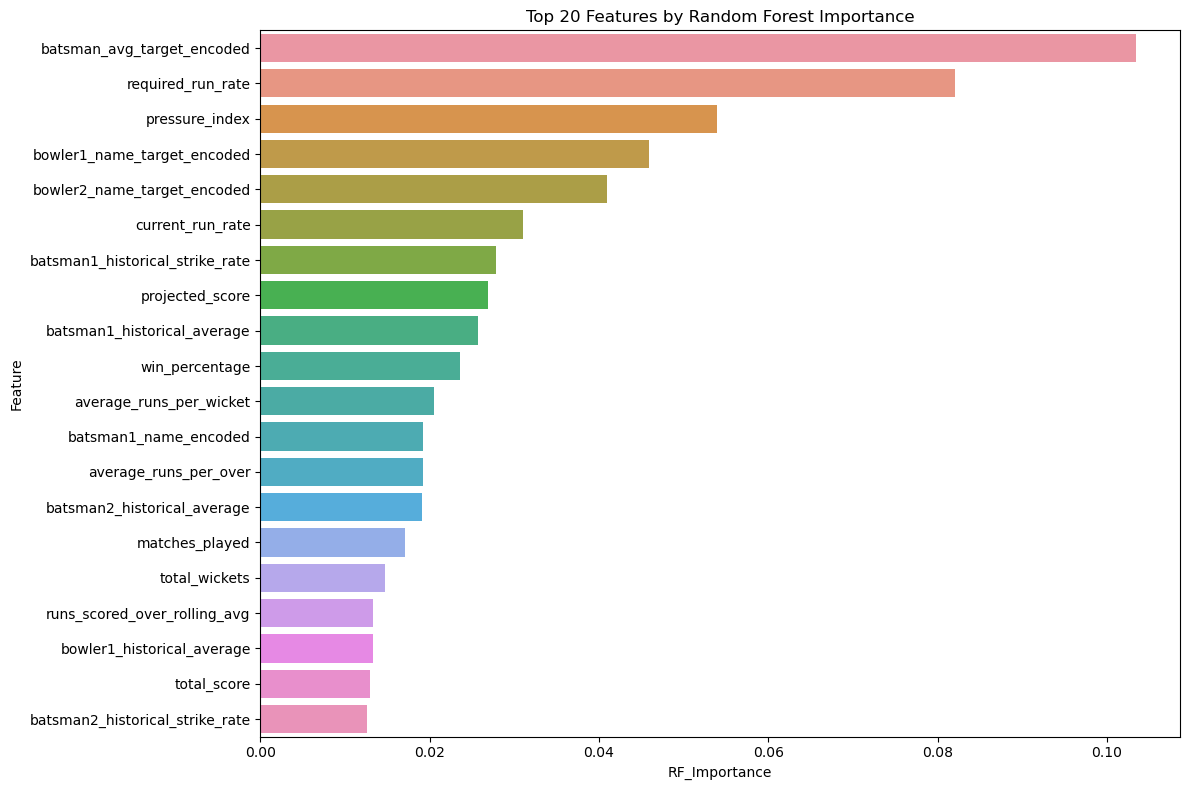


Training XGBoost for feature importance (handles missing values natively)...

Top 10 features by XGBoost importance:
                                   Feature  XGB_Importance
118             batsman_avg_target_encoded        0.061709
50                         projected_score        0.038420
49                       required_run_rate        0.035278
27                   average_runs_per_over        0.024812
48                        current_run_rate        0.023815
116            bowler1_name_target_encoded        0.022186
93            toss_winner_Rajasthan Royals        0.021510
83                        favored_team_RCB        0.021469
41    bowler2_historical_average_corrected        0.021190
44   batsman1_historical_average_corrected        0.020018


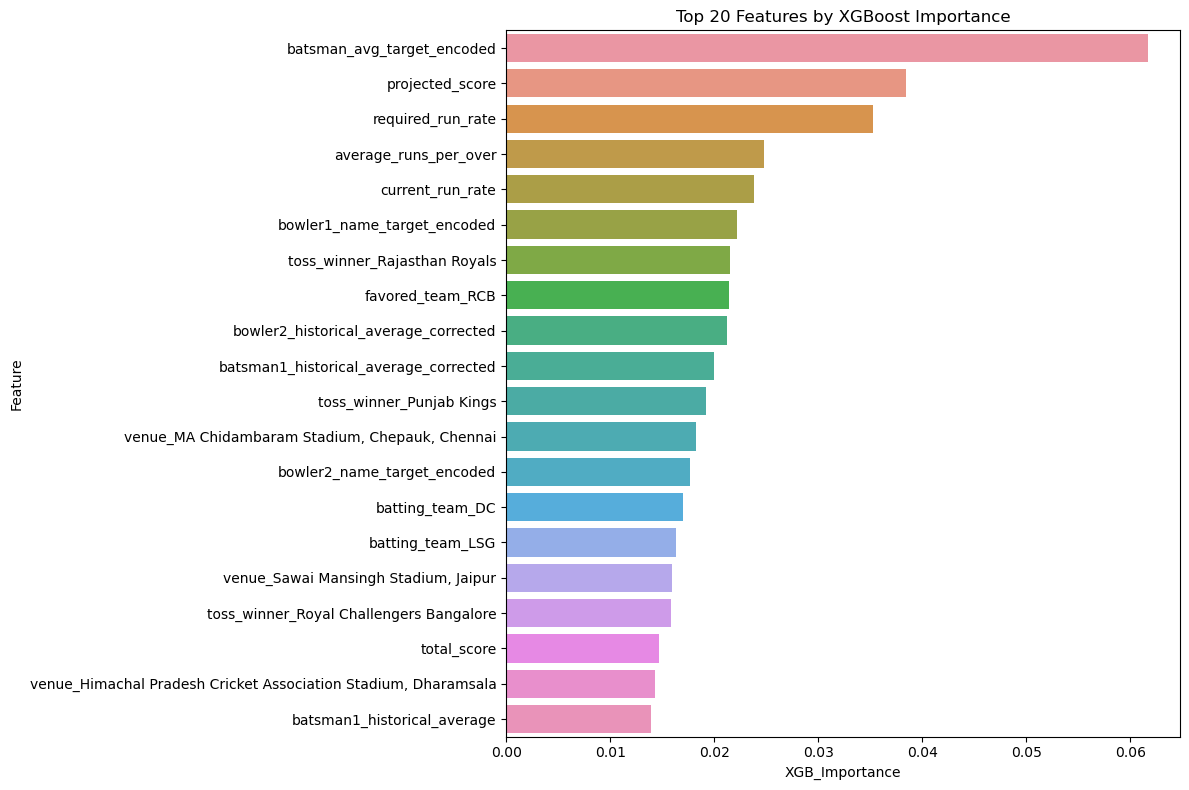


Feature importance comparison between Random Forest and XGBoost:
                           Feature  RF_Importance  XGB_Importance
0       batsman_avg_target_encoded       0.103446        0.061709
1                required_run_rate       0.082041        0.035278
2                   pressure_index       0.053947        0.007053
3      bowler1_name_target_encoded       0.045884        0.022186
4      bowler2_name_target_encoded       0.040963        0.017688
5                 current_run_rate       0.031070        0.023815
6  batsman1_historical_strike_rate       0.027817        0.008706
7                  projected_score       0.026860        0.038420
8      batsman1_historical_average       0.025732        0.013958
9                   win_percentage       0.023523        0.007647

Selected 60 features out of 119
['innings_num', 'over_number', 'ball_number', 'win_percentage', 'batsman1_runs', 'batsman1_balls_faced', 'batsman1_fours', 'batsman1_sixes', 'batsman2_runs', 'batsman2_balls_f

In [11]:
# Feature importance based selection with NaN-tolerant models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import xgboost as xgb
from lightgbm import LGBMClassifier

# Keep using Random Forest as you already have
# (It seems to be working despite NaNs, possibly due to sklearn's handling)
rf = RandomForestClassifier(n_estimators=100, random_state=42) 
rf.fit(X_train, y_train)

# Get feature importance from Random Forest
feature_importances_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'RF_Importance': rf.feature_importances_
}).sort_values('RF_Importance', ascending=False)

# Plot Random Forest feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='RF_Importance', y='Feature', data=feature_importances_rf.head(20))
plt.title('Top 20 Features by Random Forest Importance')
plt.tight_layout()
plt.show()

# Instead of Mutual Information, use XGBoost which handles NaNs natively
print("\nTraining XGBoost for feature importance (handles missing values natively)...")
xgb_model = xgb.XGBClassifier(
    n_estimators=100, 
    learning_rate=0.1,
    random_state=42,
    # The following parameter ensures XGBoost handles missing values
    missing=np.nan
)
xgb_model.fit(X_train, y_train)

# Get XGBoost feature importance
feature_importances_xgb = pd.DataFrame({
    'Feature': X_train.columns,
    'XGB_Importance': xgb_model.feature_importances_
}).sort_values('XGB_Importance', ascending=False)

print("\nTop 10 features by XGBoost importance:")
print(feature_importances_xgb.head(10))

# Plot XGBoost feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='XGB_Importance', y='Feature', data=feature_importances_xgb.head(20))
plt.title('Top 20 Features by XGBoost Importance')
plt.tight_layout()
plt.show()

# Compare feature rankings between RF and XGB
feature_comparison = pd.merge(
    feature_importances_rf, 
    feature_importances_xgb,
    on='Feature'
)

print("\nFeature importance comparison between Random Forest and XGBoost:")
print(feature_comparison.head(10))

# Select features based on Random Forest importance (as in your original code)
selector = SelectFromModel(rf, threshold='median')
selector.fit(X_train, y_train)
selected_features = X_train.columns[selector.get_support()]

print(f"\nSelected {len(selected_features)} features out of {X_train.shape[1]}")
print(selected_features.tolist())

# FIXED: Create datasets with selected features using direct column selection
# This avoids the feature name error with transform()
X_train_selected = X_train[selected_features]
print(f"X_train_selected shape: {X_train_selected.shape}")

# Check if X_test has the same columns as X_train
column_diff = set(X_train.columns) - set(X_test.columns)
if len(column_diff) > 0:
    print(f"WARNING: X_test is missing {len(column_diff)} columns that are in X_train")
    print(f"First few missing columns: {list(column_diff)[:5]}")
    
    # If X_test columns look like Column_0, Column_1, etc., X_test might be the transformed output
    if any(c.startswith('Column_') for c in X_test.columns):
        print("WARNING: X_test appears to have generic column names (Column_X)")
        print("This suggests X_test might be a transformed array rather than the original DataFrame")
        print("We need to use the original X_test DataFrame with proper feature names")
        
        # Try to recover original X_test if it was saved
        try:
            X_test_original = pd.read_csv('X_test_original.csv')
            print(f"Loaded original X_test from X_test_original.csv with shape {X_test_original.shape}")
            X_test = X_test_original
        except:
            print("ERROR: Cannot find original X_test data with proper column names")
            print("Please reload the original X_test DataFrame or re-run feature engineering")
            # If the original X_test is not available, we need to exit
            import sys
            sys.exit(1)

# Now select the features from X_test
missing_in_test = [f for f in selected_features if f not in X_test.columns]
if missing_in_test:
    print(f"WARNING: {len(missing_in_test)} selected features are missing in X_test:")
    print(missing_in_test)
    
    # Fill missing columns with zeros (as a fallback)
    for col in missing_in_test:
        X_test[col] = 0
    print("Filled missing columns with zeros")

# Now select only the columns we need
X_test_selected = X_test[selected_features]
print(f"X_test_selected shape: {X_test_selected.shape}")

# Save the selected features for future reference
pd.DataFrame({'selected_features': selected_features}).to_csv('selected_features.csv', index=False)
print("Saved selected feature names to 'selected_features.csv'")

# If needed for model training, also convert to numpy arrays
X_train_selected_array = X_train_selected.values
X_test_selected_array = X_test_selected.values

# To use these with model that expects numpy arrays:
# model.fit(X_train_selected_array, y_train)
# model.predict(X_test_selected_array)

Preparing data with clean feature names...
Cleaned 60 feature names for compatibility
Training and evaluating tree-based models...

Cross-validation scores:

Training Random Forest...
CV Accuracy: 0.7476 ± 0.0528
Test Accuracy: 0.7331
Test F1-Score: 0.7258

Model Performance Summary:
               Accuracy  Precision    Recall        F1   ROC AUC
Random Forest  0.733064   0.737249  0.714627  0.725762  0.780143

Best performing model: Random Forest

Classification Report for Best Model:
              precision    recall  f1-score   support

           0       0.73      0.75      0.74      3001
           1       0.74      0.71      0.73      2933

    accuracy                           0.73      5934
   macro avg       0.73      0.73      0.73      5934
weighted avg       0.73      0.73      0.73      5934



<Figure size 1200x800 with 0 Axes>

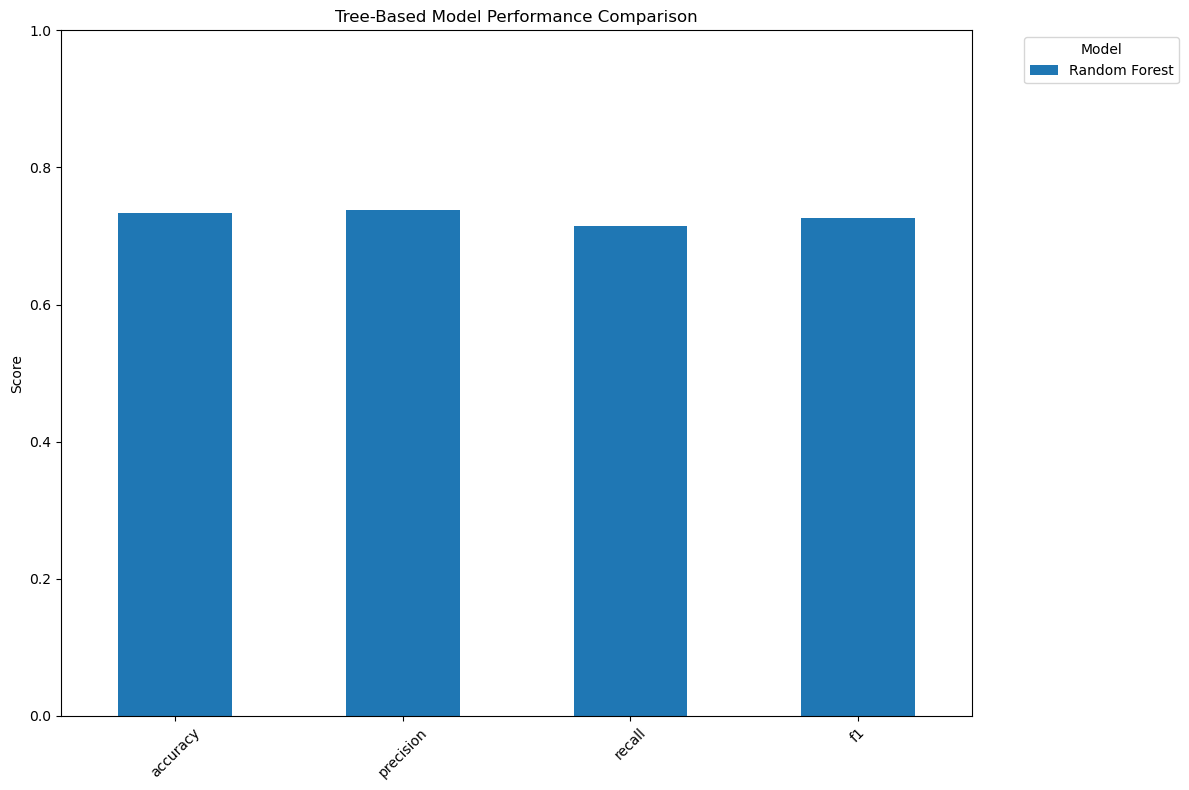

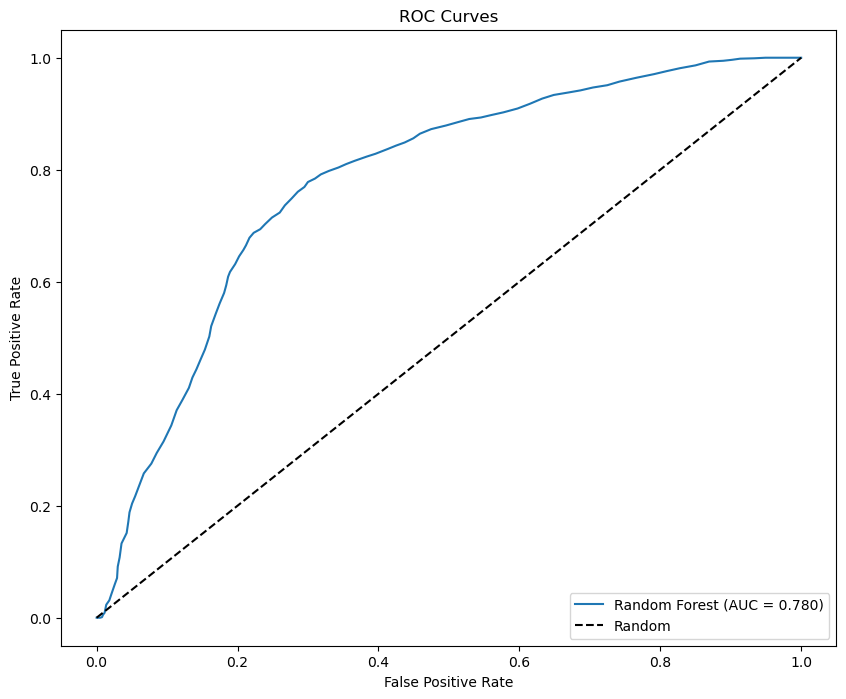

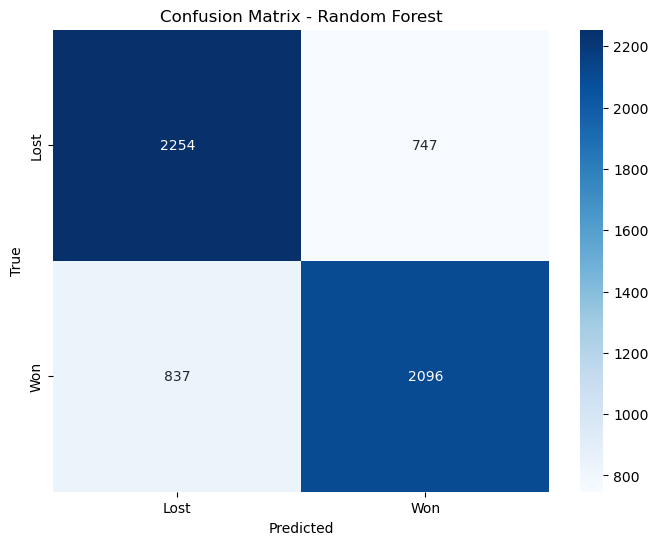

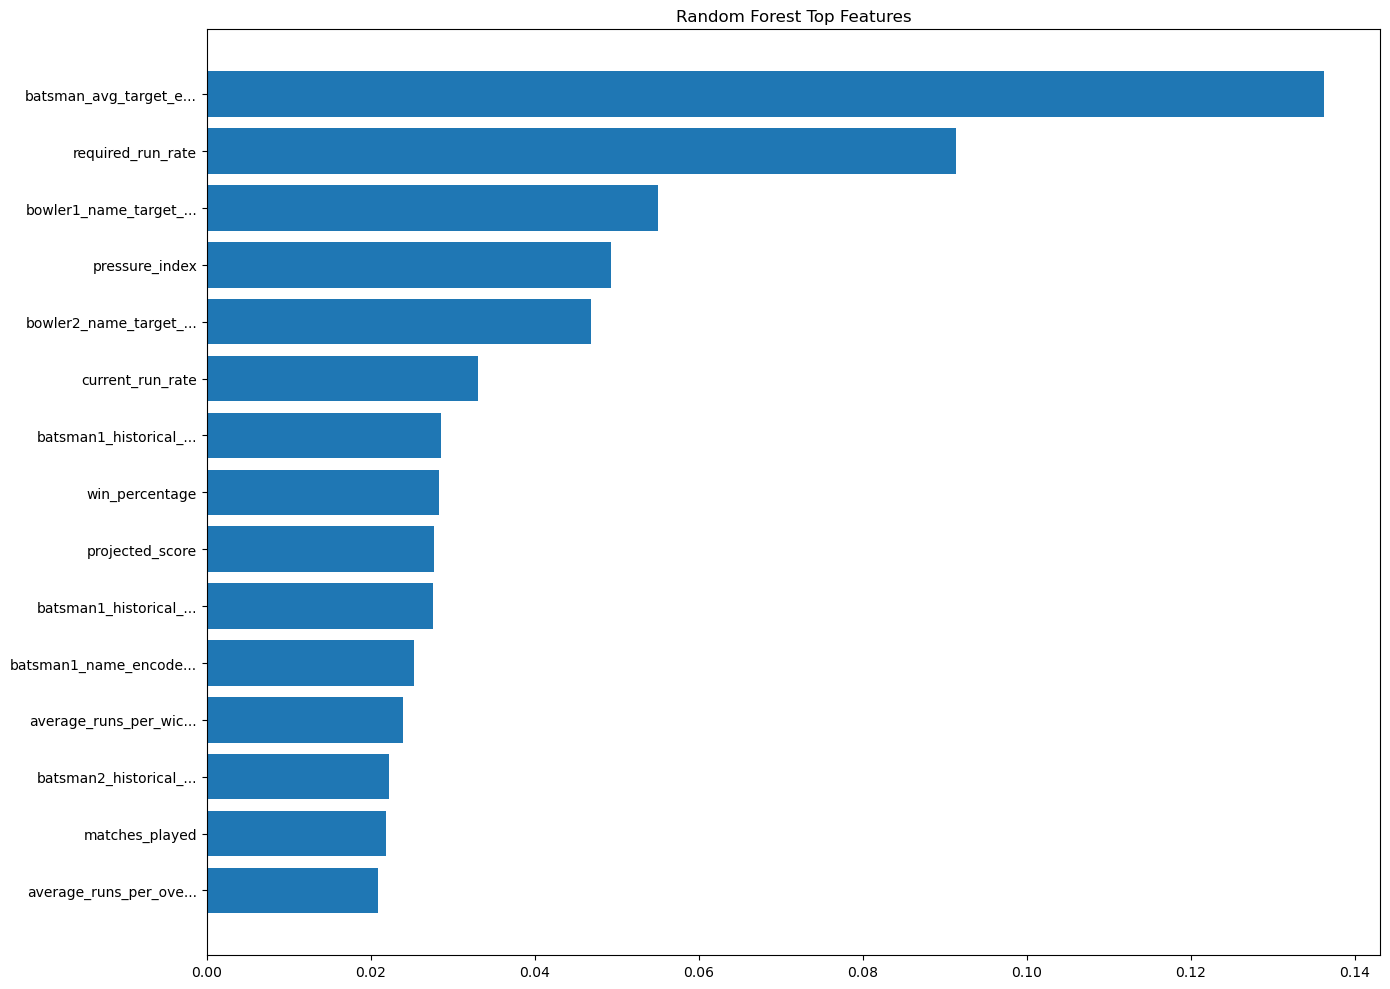


Best model saved as 'best_model_Random Forest.pkl'
Feature name mapping saved as 'feature_name_mapping.pkl'
Clean feature names saved to 'clean_feature_names.txt'

Best model hyperparameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [12]:
 # Train and evaluate tree-based models on selected features
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier
import re

# First, create a clean version of feature names (removing special chars)
print("Preparing data with clean feature names...")

# Function to clean feature names for compatibility with LightGBM
def clean_feature_name(name):
    # Replace special characters with underscores
    clean_name = re.sub(r'[^\w]+', '_', str(name))
    # Make sure it doesn't start with a number
    if clean_name[0].isdigit():
        clean_name = 'f_' + clean_name
    return clean_name

# Create copies of the selected data with clean column names
X_train_clean = X_train_selected.copy()
X_test_clean = X_test_selected.copy()

# Rename columns to clean versions
name_mapping = {}
for col in X_train_selected.columns:
    clean_name = clean_feature_name(col)
    # Ensure uniqueness
    if clean_name in name_mapping.values():
        i = 1
        while f"{clean_name}_{i}" in name_mapping.values():
            i += 1
        clean_name = f"{clean_name}_{i}"
    name_mapping[col] = clean_name

# Apply the clean names
X_train_clean.columns = [name_mapping[col] for col in X_train_clean.columns]
X_test_clean.columns = [name_mapping[col] for col in X_test_clean.columns]

print(f"Cleaned {len(name_mapping)} feature names for compatibility")

# Define models - focusing on tree-based models only as requested
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    #'XGBoost': xgb.XGBClassifier(random_state=42, missing=np.nan),
    #'LightGBM': LGBMClassifier(random_state=42)
}

# Dictionary to store results
results = {}

print("Training and evaluating tree-based models...")

# Train and evaluate each model with cross-validation
print("\nCross-validation scores:")
for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Use clean feature names for all models to ensure consistency
    try:
        # Cross-validation
        cv_scores = cross_val_score(model, X_train_clean, y_train, cv=5, scoring='accuracy')
        results[name] = {
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std()
        }
        print(f"CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
        
        # Train on full training set
        model.fit(X_train_clean, y_train)
        
        # Predict on test set
        y_pred = model.predict(X_test_clean)
        y_pred_proba = model.predict_proba(X_test_clean)[:, 1] if hasattr(model, "predict_proba") else None
        # Calculate metrics
        results[name]['accuracy'] = accuracy_score(y_test, y_pred)
        results[name]['precision'] = precision_score(y_test, y_pred, average='binary')
        results[name]['recall'] = recall_score(y_test, y_pred, average='binary')
        results[name]['f1'] = f1_score(y_test, y_pred, average='binary')
        
        if y_pred_proba is not None:
            results[name]['roc_auc'] = roc_auc_score(y_test, y_pred_proba)
        
        # Store model and predictions for later use
        results[name]['model'] = model
        results[name]['y_pred'] = y_pred
        results[name]['y_pred_proba'] = y_pred_proba
        
        print(f"Test Accuracy: {results[name]['accuracy']:.4f}")
        print(f"Test F1-Score: {results[name]['f1']:.4f}")
    
    except Exception as e:
        print(f"Error training {name}: {str(e)}")
        # Continue with next model
        continue

# Create results table with only successfully trained models
if not results:
    print("\nNo models were successfully trained!")
else:
    metrics_df = pd.DataFrame({
        model_name: {
            'Accuracy': results[model_name]['accuracy'],
            'Precision': results[model_name]['precision'],
            'Recall': results[model_name]['recall'],
            'F1': results[model_name]['f1'],
            'ROC AUC': results[model_name].get('roc_auc', 'N/A')
        } for model_name in results.keys()
    })

    print("\nModel Performance Summary:")
    print(metrics_df.T)

    # Find best model based on F1 score
    best_model_name = max(results.items(), key=lambda x: x[1]['f1'])[0]
    print(f"\nBest performing model: {best_model_name}")

    # Detailed report for best model
    print("\nClassification Report for Best Model:")
    print(classification_report(y_test, results[best_model_name]['y_pred']))

    # Visualizations
    # 1. Model Comparison Bar Chart
    plt.figure(figsize=(12, 8))
    metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1']
    comparison_data = {name: [results[name][metric] for metric in metrics_to_plot] 
                      for name in results.keys()}

    comparison_df = pd.DataFrame(comparison_data, index=metrics_to_plot)
    comparison_df.plot(kind='bar', figsize=(12, 8))
    plt.title('Tree-Based Model Performance Comparison')
    plt.ylabel('Score')
    plt.ylim(0, 1.0)
    plt.xticks(rotation=45)
    plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # 2. ROC Curves
    plt.figure(figsize=(10, 8))
    for name, result in results.items():
        if 'roc_auc' in result:
            y_pred_proba = result['y_pred_proba']
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
            plt.plot(fpr, tpr, label=f"{name} (AUC = {result['roc_auc']:.3f})")

    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend(loc='lower right')
    plt.show()

    # 3. Confusion Matrix for Best Model
    plt.figure(figsize=(8, 6))
    best_model = results[best_model_name]['model']
    cm = confusion_matrix(y_test, results[best_model_name]['y_pred'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Lost', 'Won'], yticklabels=['Lost', 'Won'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {best_model_name}')
    plt.show()

    # 4. Feature importance plot for all models
    plt.figure(figsize=(14, 10))

    for i, (name, model) in enumerate(results.items()):
        model_obj = model['model']
        if hasattr(model_obj, 'feature_importances_'):
            # Get feature importances
            importances = model_obj.feature_importances_
            indices = np.argsort(importances)[-15:]  # Top 15 features
            
            # Get clean feature names
            clean_feature_names = list(X_train_clean.columns)
            
            # Create reverse mapping to get original feature names
            inv_map = {v: k for k, v in name_mapping.items()}
            
            plt.subplot(1, len(results), i+1)
            plt.barh(range(len(indices)), importances[indices])
            
            # Use original feature names for display if available
            display_names = [inv_map.get(clean_feature_names[j], clean_feature_names[j]) for j in indices]
            # Shorten names if too long
            display_names = [name[:20] + '...' if len(name) > 20 else name for name in display_names]
            
            plt.yticks(range(len(indices)), display_names)
            plt.title(f'{name} Top Features')
            plt.tight_layout()

    plt.subplots_adjust(wspace=0.5)
    plt.show()

    # Save the best model and feature name mapping for prediction
    import joblib
    joblib.dump(results[best_model_name]['model'], f'best_model_{best_model_name}.pkl')
    joblib.dump(name_mapping, 'feature_name_mapping.pkl')
    print(f"\nBest model saved as 'best_model_{best_model_name}.pkl'")
    print("Feature name mapping saved as 'feature_name_mapping.pkl'")

    # Save the cleaned feature names for future prediction
    with open('clean_feature_names.txt', 'w') as f:
        for col in X_train_clean.columns:
            f.write(f"{col}\n")
    print("Clean feature names saved to 'clean_feature_names.txt'")

    # Print hyperparameters of best model
    print(f"\nBest model hyperparameters:")
    print(results[best_model_name]['model'].get_params())

In [11]:
# Add these imports at the top of your script
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np
import joblib

# Neural Network wrapper for sklearn compatibility
class NeuralNetClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, input_dim=None, hidden_layers=[64, 32], dropout_rate=0.3, 
                 activation='relu', learning_rate=0.001, epochs=100, batch_size=32, 
                 verbose=1, random_state=42):
        self.input_dim = input_dim
        self.hidden_layers = hidden_layers
        self.dropout_rate = dropout_rate
        self.activation = activation
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.random_state = random_state
        self.model = None
        self.feature_names_in_ = None
        self.history = None
        self.scaler = StandardScaler()
        
    def _build_model(self, input_dim):
        """Build the neural network model architecture"""
        # Set random seeds for reproducibility
        import tensorflow as tf
        import numpy as np
        tf.random.set_seed(self.random_state)
        np.random.seed(self.random_state)
        
        model = Sequential()
        # Input layer
        model.add(Dense(self.hidden_layers[0], input_dim=input_dim, 
                       activation=self.activation))
        model.add(BatchNormalization())
        model.add(Dropout(self.dropout_rate))
        
        # Hidden layers
        for units in self.hidden_layers[1:]:
            model.add(Dense(units, activation=self.activation))
            model.add(BatchNormalization())
            model.add(Dropout(self.dropout_rate))
        
        # Output layer
        model.add(Dense(1, activation='sigmoid'))
        
        # Compile model
        optimizer = keras.optimizers.Adam(learning_rate=self.learning_rate)
        model.compile(loss='binary_crossentropy', 
                     optimizer=optimizer, 
                     metrics=['accuracy'])
        return model
    
    def fit(self, X, y):
        # Store feature names for later use
        self.feature_names_in_ = X.columns.tolist()
        
        # Scale the features - neural networks need normalized inputs
        X_scaled = self.scaler.fit_transform(X)
        
        # Set input dimension if not provided
        if self.input_dim is None:
            self.input_dim = X.shape[1]
        
        # Build model
        self.model = self._build_model(self.input_dim)
        
        # Early stopping to prevent overfitting
        early_stop = EarlyStopping(
            monitor='val_loss', 
            patience=10, 
            restore_best_weights=True,
            verbose=1
        )
        
        # Train model
        self.history = self.model.fit(
            X_scaled, y,
            epochs=self.epochs,
            batch_size=self.batch_size,
            verbose=self.verbose,
            validation_split=0.2,  # 20% validation set
            callbacks=[early_stop]
        )
        
        return self
    
    def predict(self, X):
        # Scale inputs
        X_scaled = self.scaler.transform(X)
        # Get predictions and convert to binary
        y_pred_proba = self.model.predict(X_scaled, verbose=0)
        return (y_pred_proba > 0.5).astype(int).flatten()
    
    def predict_proba(self, X):
        # Scale inputs
        X_scaled = self.scaler.transform(X)
        # Get raw probabilities
        y_pred = self.model.predict(X_scaled, verbose=0).flatten()
        # Return in sklearn's expected format [P(0), P(1)]
        return np.vstack((1-y_pred, y_pred)).T

# Add Neural Network to your models dictionary
models['Neural Network'] = NeuralNetClassifier(
    hidden_layers=[128, 64, 32],  # 3 hidden layers
    dropout_rate=0.3,             # Prevents overfitting
    learning_rate=0.001,          # Adam optimizer learning rate
    epochs=100,                   # Maximum epochs (early stopping may reduce this)
    batch_size=32,                # Batch size for training
    verbose=1                     # Show progress during training
)

# After your existing visualization code, add this new section for neural network visualizations
if 'Neural Network' in results:
    nn_results = results['Neural Network']
    
    # 1. Plot learning curves (training history)
    if hasattr(nn_results['model'], 'history') and nn_results['model'].history is not None:
        history = nn_results['model'].history.history
        
        plt.figure(figsize=(12, 5))
        
        # Accuracy subplot
        plt.subplot(1, 2, 1)
        plt.plot(history['accuracy'], label='Training')
        plt.plot(history['val_accuracy'], label='Validation')
        plt.title('Model Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        
        # Loss subplot
        plt.subplot(1, 2, 2)
        plt.plot(history['loss'], label='Training')
        plt.plot(history['val_loss'], label='Validation')
        plt.title('Model Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        
        plt.tight_layout()
        plt.show()
    
    # Save the NN model separately since it's a Keras model
    if best_model_name == 'Neural Network':
        # Save the Keras model
        nn_results['model'].model.save('best_model_NeuralNetwork')
        print("Neural Network model saved as 'best_model_NeuralNetwork'")
        
        # Save the scaler for preprocessing future data
        joblib.dump(nn_results['model'].scaler, 'neural_network_scaler.pkl')
        print("Neural Network scaler saved as 'neural_network_scaler.pkl'")

ImportError: Traceback (most recent call last):
  File "c:\Users\admn\anaconda3\Lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 73, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: A dynamic link library (DLL) initialization routine failed.


Failed to load the native TensorFlow runtime.
See https://www.tensorflow.org/install/errors for some common causes and solutions.
If you need help, create an issue at https://github.com/tensorflow/tensorflow/issues and include the entire stack trace above this error message.

Loading model and data...
Loaded model: best_model_Random Forest.pkl
Model type: Random Forest
Loaded test data: X shape (5934, 119), y shape (5934,)
Found win_percentage column in test data
Found 10 batting_team_* columns (e.g., batting_team_CSK)
Found 10 favored_team_* columns (e.g., favored_team_CSK)
Model requires exactly 60 specific features
Example required features:
  - innings_num
  - over_number
  - ball_number
  - win_percentage
  - batsman1_runs
Loaded 60 selected features from file
Loaded 60 clean feature names

Building feature name mapping...
Still missing 2 features - attempting fuzzy mapping
Successfully mapped 60 out of 60 required features

Preparing test data with matching features...
Final test data shape: (5934, 60)
✓ Feature names match exactly - ready for prediction

Making predictions...
Successfully made predictions!

Prediction distribution:
  Class 0: 3091 predictions (52.1%)
  Class 1: 2843 predictions (47.9%)
Generated probability predictions

Test Accuracy

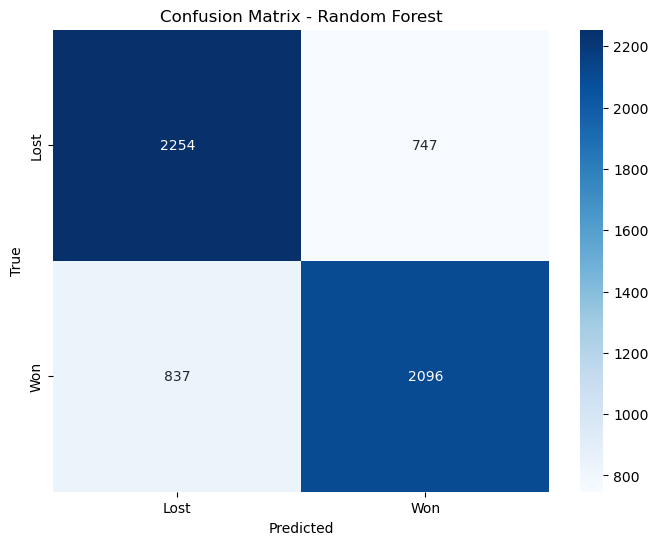

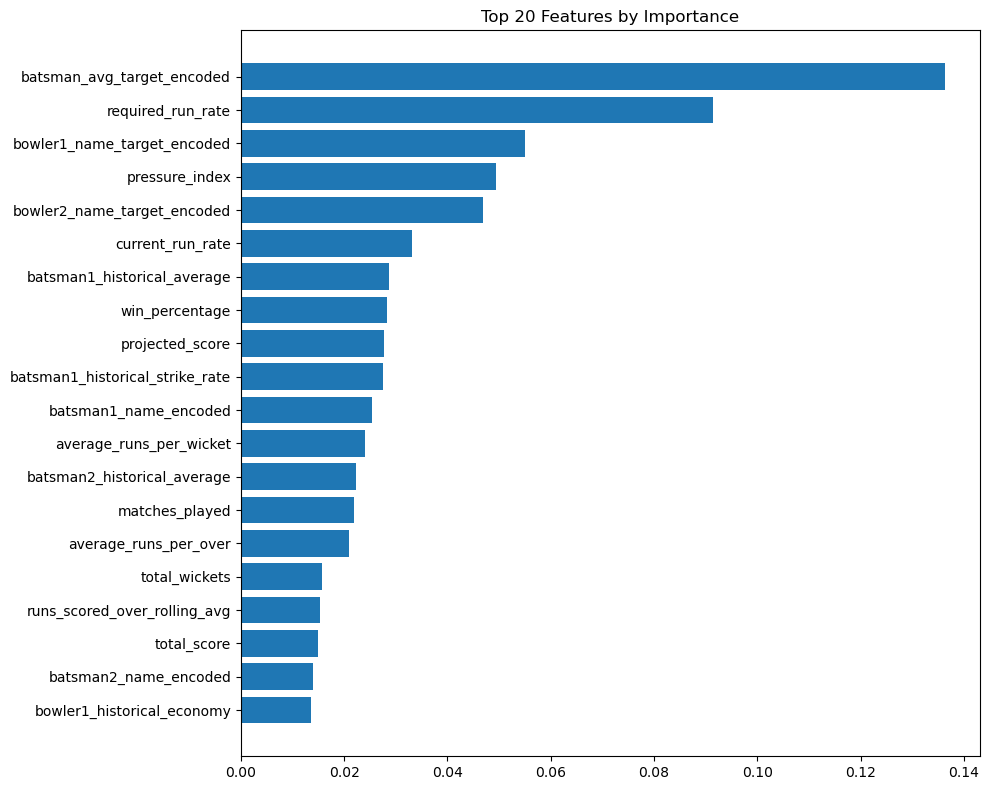

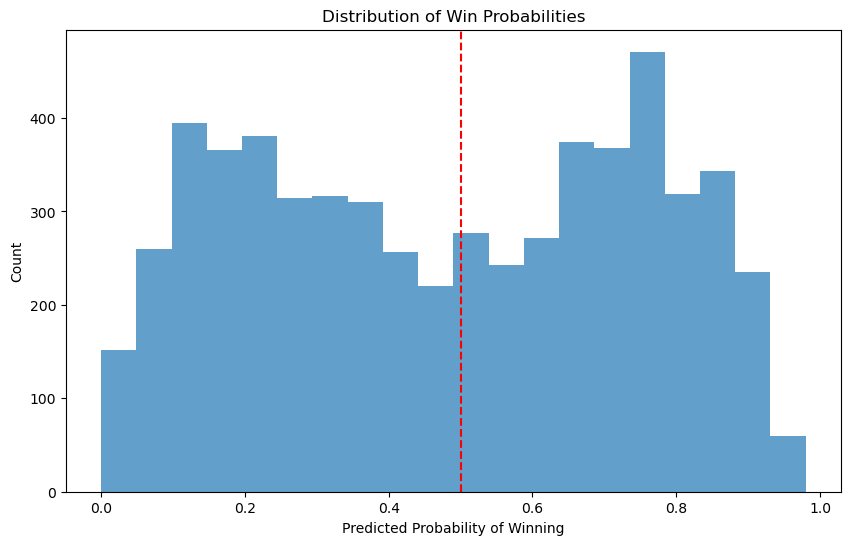

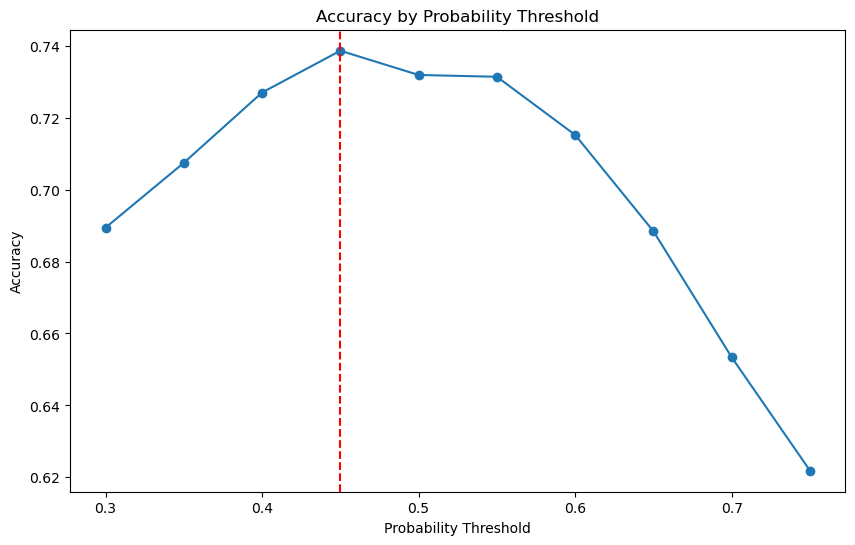

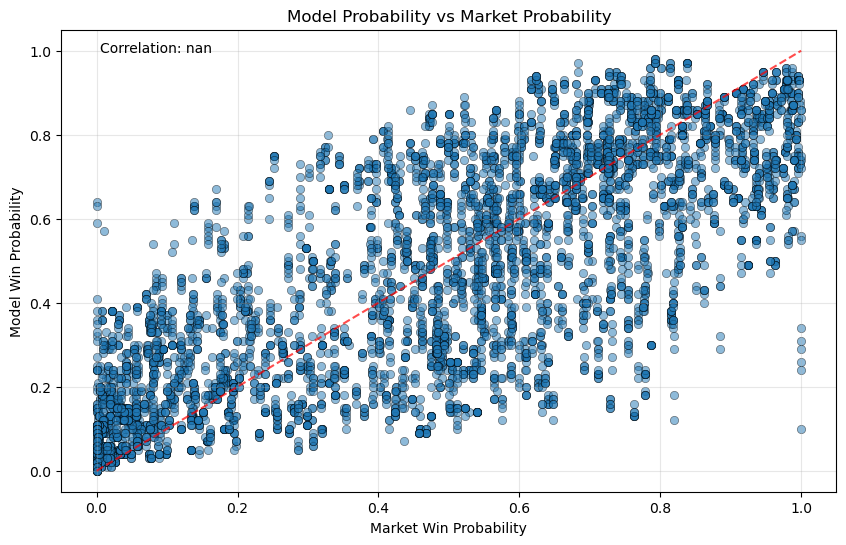

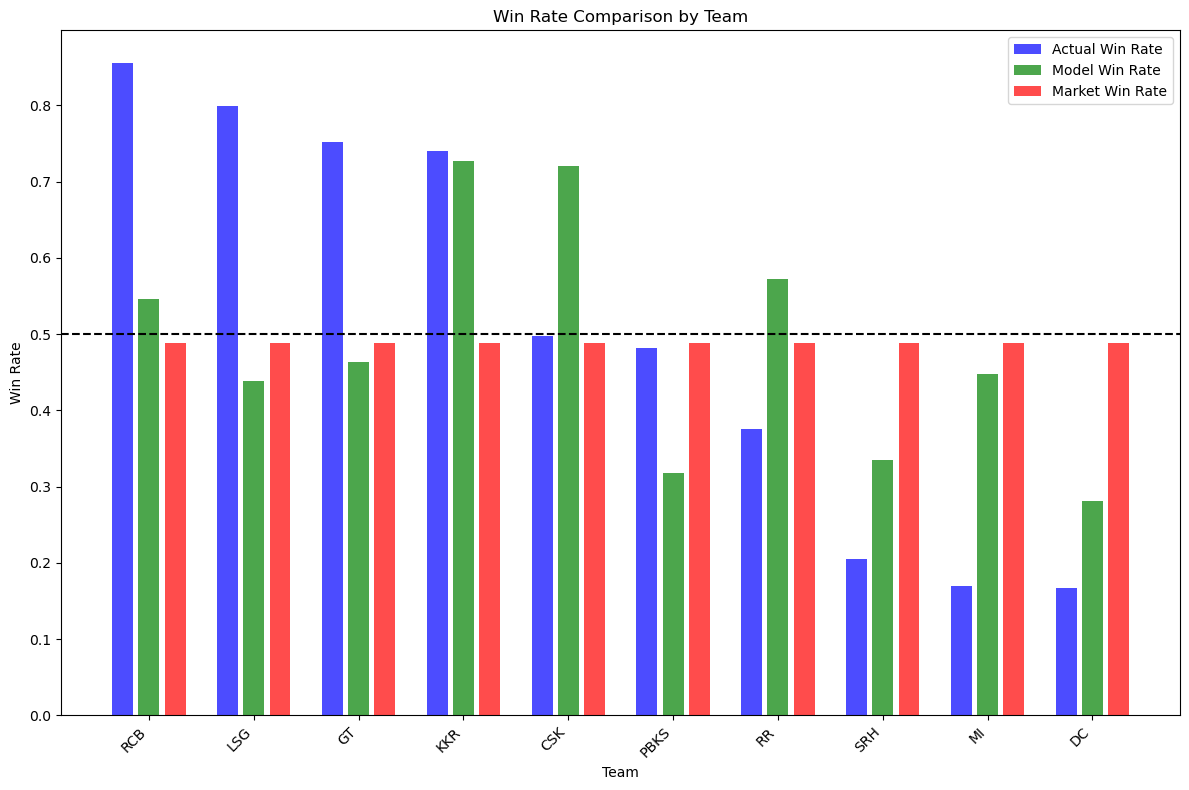

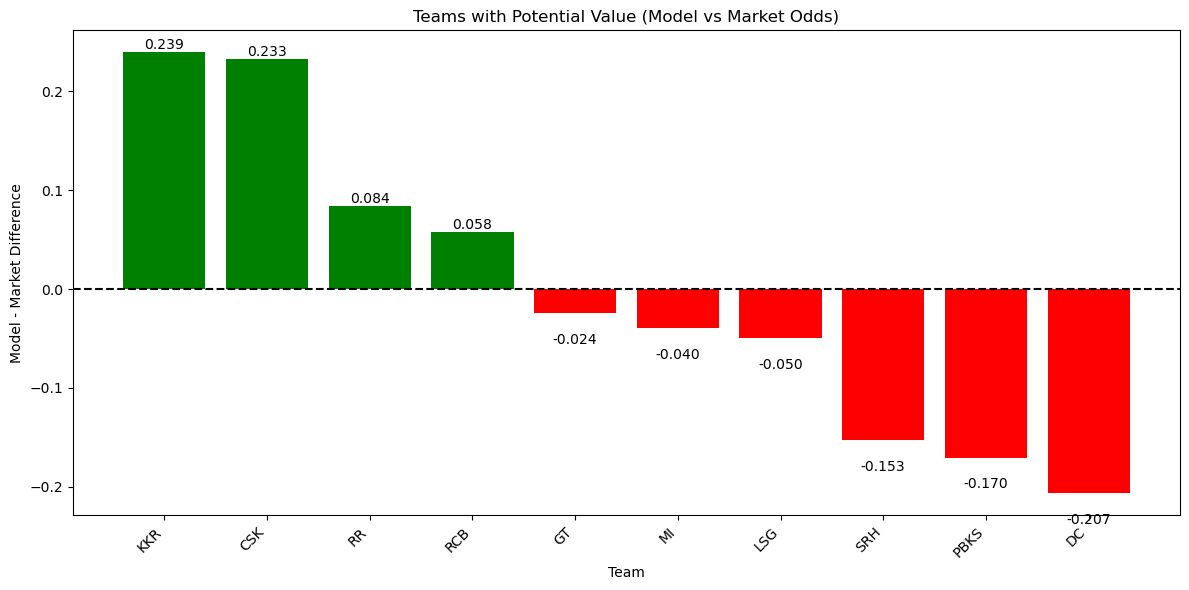

In [14]:
import pandas as pd
import numpy as np
import joblib
import os
import re
from sklearn.discriminant_analysis import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



def clean_column_name(col_name):
    """Standardize column names to match training data format"""
    # Replace spaces with underscores
    col_name = str(col_name).replace(' ', '_')
    # Replace commas with underscores
    col_name = col_name.replace(',', '_')
    # Remove any other special characters
    col_name = re.sub(r'[^\w_]', '', col_name)
    return col_name

def load_and_predict():
    print("Loading model and data...")
    
    # 1. Load the trained model
    try:
        model_files = [f for f in os.listdir() if f.startswith('best_model_') and f.endswith('.pkl')]
        if model_files:
            best_model = joblib.load(model_files[0])
            print(f"Loaded model: {model_files[0]}")
            model_type = model_files[0].split('_')[2].split('.')[0]
            print(f"Model type: {model_type}")
        else:
            raise FileNotFoundError("No model files found")
    except Exception as e:
        print(f"Error loading model: {e}")
        return
    
    # 2. Load test data and target
    try:
        X_test_raw = pd.read_csv('X_test.csv')
        y_test = pd.read_csv('y_test.csv').squeeze()
        print(f"Loaded test data: X shape {X_test_raw.shape}, y shape {y_test.shape}")
        
        # Extract team information and win_percentage
        team_cols = ['batting_team', 'bowling_team', 'win_percentage', 'favored_team']
        team_data = {}
        
        # Get the raw team columns
        for col in team_cols:
            if col in X_test_raw.columns:
                team_data[col] = X_test_raw[col]
                print(f"Found {col} column in test data")
        
        # Also extract team one-hot encoded columns
        team_prefix_cols = {
            'batting_team_': [],
            'favored_team_': [],
            'bowling_team_': []
        }
        
        for col in X_test_raw.columns:
            for prefix in team_prefix_cols:
                if col.startswith(prefix):
                    team_prefix_cols[prefix].append(col)
                    team_data[col] = X_test_raw[col]
        
        # Report found columns
        for prefix, cols in team_prefix_cols.items():
            if cols:
                print(f"Found {len(cols)} {prefix}* columns (e.g., {cols[0]})")
        
    except Exception as e:
        print(f"Error loading test data: {e}")
        return
    
    # 3. Get required features from model
    if hasattr(best_model, 'feature_names_in_'):
        required_features = best_model.feature_names_in_
        print(f"Model requires exactly {len(required_features)} specific features")
        
        # Print some examples of required features
        print("Example required features:")
        for feat in required_features[:5]:
            print(f"  - {feat}")
    else:
        print("Model doesn't have feature_names_in_ attribute")
        return

    # 4. Try to load original X_train to understand feature names
    try:
        # Try loading the feature importance file which might have correct feature names
        if os.path.exists('feature_importance.csv'):
            feature_info = pd.read_csv('feature_importance.csv')
            print(f"Loaded feature importance with {len(feature_info)} features")
            
            # Check if features match what model requires
            if 'Feature' in feature_info.columns:
                original_features = feature_info['Feature'].tolist()
                if set(original_features[:len(required_features)]) == set(required_features):
                    print("Feature names from feature_importance.csv match model requirements")
        
        # Try loading selected features directly if available
        if os.path.exists('selected_features.csv'):
            selected_df = pd.read_csv('selected_features.csv')
            if 'selected_features' in selected_df.columns:
                original_features = selected_df['selected_features'].tolist()
                print(f"Loaded {len(original_features)} selected features from file")
        
        # Try loading clean feature names if available
        if os.path.exists('clean_feature_names.txt'):
            with open('clean_feature_names.txt', 'r') as f:
                clean_features = [line.strip() for line in f.readlines()]
                print(f"Loaded {len(clean_features)} clean feature names")
    except Exception as e:
        print(f"Could not load feature information: {e}")
    
    # 5. Create a mapping between test columns and model features
    print("\nBuilding feature name mapping...")
    feature_map = {}
    
    # Clean test data column names
    X_test = X_test_raw.copy()
    X_test.columns = [clean_column_name(col) for col in X_test.columns]
    
    # Direct match - exact matches first
    for req_feat in required_features:
        if req_feat in X_test.columns:
            feature_map[req_feat] = req_feat
    
    # Try to find matches for missing features
    missing_features = [f for f in required_features if f not in feature_map]
    test_columns = [c for c in X_test.columns if c not in feature_map.values()]
    
    if missing_features:
        print(f"Still missing {len(missing_features)} features - attempting fuzzy mapping")
        
        # Function to normalize feature names for comparison
        def normalize_name(name):
            return name.lower().replace('_', '').replace(' ', '')
        
        # Try simple matching
        for missing in missing_features:
            norm_missing = normalize_name(missing)
            # Try to find in test columns first
            found = False
            for col in test_columns:
                if normalize_name(col) == norm_missing:
                    feature_map[missing] = col
                    test_columns.remove(col)
                    found = True
                    break
            
            # If not found with exact match, try prefix/suffix matching
            if not found:
                for col in test_columns:
                    norm_col = normalize_name(col)
                    # If one is prefix/suffix of the other with 80% overlap
                    if (norm_missing in norm_col or norm_col in norm_missing) and \
                       (len(norm_missing) >= 0.8*len(norm_col) or len(norm_col) >= 0.8*len(norm_missing)):
                        feature_map[missing] = col
                        test_columns.remove(col)
                        found = True
                        break
    
    # Report mapping status
    mapped_features = set(feature_map.keys())
    still_missing = set(required_features) - mapped_features
    print(f"Successfully mapped {len(mapped_features)} out of {len(required_features)} required features")
    if still_missing:
        print(f"Still missing {len(still_missing)} features - will fill with zeros")
        for feat in list(still_missing)[:5]:  # Show first 5
            print(f"  - Missing: {feat}")
    
    # 6. Create a new test set with exactly the right features in the right order
    print("\nPreparing test data with matching features...")
    X_test_prepared = pd.DataFrame(index=X_test.index)
    
    for feat in required_features:
        if feat in feature_map:
            X_test_prepared[feat] = X_test[feature_map[feat]]
        else:
            # Fill missing features with 0
            X_test_prepared[feat] = 0
            print(f"Filled '{feat}' with zeros (missing feature)")
    
    print(f"Final test data shape: {X_test_prepared.shape}")
    
    # Verify feature names match exactly
    if list(X_test_prepared.columns) == list(required_features):
        print("✓ Feature names match exactly - ready for prediction")
    else:
        print("⚠ Feature names don't match exactly - prediction may fail")
        return
    
    # 7. Make predictions
    try:
        print("\nMaking predictions...")
        y_pred = best_model.predict(X_test_prepared)
        print("Successfully made predictions!")
        
        # Check prediction distribution
        unique_vals, counts = np.unique(y_pred, return_counts=True)
        print("\nPrediction distribution:")
        for val, count in zip(unique_vals, counts):
            print(f"  Class {val}: {count} predictions ({count/len(y_pred)*100:.1f}%)")
        
        # Get both class probabilities if available
        y_pred_proba_all = None
        if hasattr(best_model, "predict_proba"):
            y_pred_proba_all = best_model.predict_proba(X_test_prepared)
            y_pred_proba = y_pred_proba_all[:, 1]  # Probability for class 1 (Win)
            print("Generated probability predictions")
        else:
            y_pred_proba = None
            print("Model doesn't support probability predictions")
            
        # 8. Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        print(f"\nTest Accuracy: {accuracy:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))
        
        # 9. Create and save confusion matrix
        plt.figure(figsize=(8, 6))
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=['Lost', 'Won'], yticklabels=['Lost', 'Won'])
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title(f'Confusion Matrix - {model_type}')
        plt.savefig('confusion_matrix.png')
        print("Saved confusion matrix visualization to 'confusion_matrix.png'")
        
        # 10. Create a results dataframe
        results_df = pd.DataFrame({
            'actual': y_test,
            'predicted': y_pred,
            'correct': y_test == y_pred
        })
        
        # Add probability information
        if y_pred_proba is not None:
            results_df['probability'] = y_pred_proba
            
        if y_pred_proba_all is not None:
            results_df['probability_class_0'] = y_pred_proba_all[:, 0]  # Loss probability
            results_df['probability_class_1'] = y_pred_proba_all[:, 1]  # Win probability
        
        # Add all team information from team_data
        for col, data in team_data.items():
            results_df[col] = data.values
            
        # Track specific types of columns added
        batting_cols_added = 0
        favored_cols_added = 0
            
        # Count types of columns added
        for col in team_data.keys():
            if col.startswith('batting_team_'):
                batting_cols_added += 1
            elif col.startswith('favored_team_'):
                favored_cols_added += 1
                
        print(f"Added {batting_cols_added} batting_team_* columns")
        print(f"Added {favored_cols_added} favored_team_* columns")
        
        # If team columns were found, identify actual teams from one-hot columns
        if batting_cols_added > 0 and 'batting_team' not in results_df.columns:
            # Try to extract team names from column names
            team_cols = [col for col in results_df.columns if col.startswith('batting_team_')]
            
            def extract_team(row):
                for col in team_cols:
                    if row[col] == 1:
                        return col.replace('batting_team_', '')
                return 'Unknown'
                
            results_df['batting_team'] = results_df.apply(extract_team, axis=1)
            print("Created batting_team column from one-hot encoded columns")
            
        # Add favored team by model if not already in data
        if 'favored_team' not in results_df.columns and 'batting_team' in results_df.columns and 'bowling_team' in results_df.columns:
            if 'probability' in results_df.columns:
                results_df['model_favored_team'] = np.where(
                    results_df['probability'] >= 0.5, 
                    results_df['batting_team'], 
                    results_df['bowling_team']
                )
                print("Added model_favored_team to results")
                
        # Try to add match metadata if available
        try:
            matches_df = pd.read_csv('test_match_ids.csv')
            if len(matches_df) == len(results_df):
                # Extract match_id and any other useful columns
                id_cols = [col for col in matches_df.columns 
                           if col not in results_df.columns]
                
                if id_cols:
                    for col in id_cols:
                        results_df[col] = matches_df[col].values
                    print(f"Added {len(id_cols)} columns from match_ids file")
                else:
                    print("No new columns to add from match_ids file")
        except Exception as e:
            print(f"Could not find or load match metadata: {e}")
            
        # Add over/innings info if available
        cricket_cols = ['over_number', 'innings_num', 'ball_number']
        for col in cricket_cols:
            if col in X_test_raw.columns and col not in results_df.columns:
                results_df[col] = X_test_raw[col].values
                print(f"Added {col} to results")
                
        # 11. Create match phase indicators if over_number exists
        if 'over_number' in results_df.columns:
            # Define cricket phases
            results_df['powerplay'] = (results_df['over_number'] <= 6).astype(int)
            results_df['middle_overs'] = ((results_df['over_number'] > 6) & (results_df['over_number'] <= 15)).astype(int)
            results_df['death_overs'] = (results_df['over_number'] > 15).astype(int)
            
            # Create phase column for analysis
            phase_map = {
                1: 'Powerplay' if 'powerplay' in results_df.columns else None,
                2: 'Middle' if 'middle_overs' in results_df.columns else None,
                3: 'Death' if 'death_overs' in results_df.columns else None
            }
            
            def get_phase(row):
                if row['powerplay'] == 1:
                    return 'Powerplay'
                elif row['middle_overs'] == 1:
                    return 'Middle'
                elif row['death_overs'] == 1:
                    return 'Death'
                else:
                    return 'Unknown'
                    
            results_df['match_phase'] = results_df.apply(get_phase, axis=1)
            print("Added match phase indicators")
                
        # 12. Save results
        results_df.to_csv('prediction_results_with_teams.csv', index=False)
        print("Saved prediction results to 'prediction_results_with_teams.csv'")
        
        # 13. Feature importance analysis if available
        if hasattr(best_model, 'feature_importances_'):
            importances = best_model.feature_importances_
            indices = np.argsort(importances)[-20:]  # Top 20 features
            
            plt.figure(figsize=(10, 8))
            plt.barh(range(len(indices)), importances[indices])
            plt.yticks(range(len(indices)), [required_features[i] for i in indices])
            plt.title('Top 20 Features by Importance')
            plt.tight_layout()
            plt.savefig('feature_importance.png')
            print("Saved feature importance visualization to 'feature_importance.png'")
        
        # 14. Additional insights for probability models
        if y_pred_proba is not None:
            plt.figure(figsize=(10, 6))
            plt.hist(results_df['probability'], bins=20, alpha=0.7)
            plt.axvline(0.5, color='red', linestyle='--')
            plt.title('Distribution of Win Probabilities')
            plt.xlabel('Predicted Probability of Winning')
            plt.ylabel('Count')
            plt.savefig('probability_distribution.png')
            print("Saved probability distribution to 'probability_distribution.png'")
            
            # Analyze probability thresholds
            thresholds = np.arange(0.3, 0.8, 0.05)
            threshold_results = []
            
            for threshold in thresholds:
                custom_pred = (results_df['probability'] >= threshold).astype(int)
                acc = accuracy_score(y_test, custom_pred)
                threshold_results.append({
                    'threshold': threshold,
                    'accuracy': acc
                })
                
            threshold_df = pd.DataFrame(threshold_results)
            best_threshold = threshold_df.loc[threshold_df['accuracy'].idxmax()]
            
            print(f"\nOptimal probability threshold: {best_threshold['threshold']:.2f} "
                 f"(accuracy: {best_threshold['accuracy']:.4f})")
            
            # Save threshold analysis
            plt.figure(figsize=(10, 6))
            plt.plot(threshold_df['threshold'], threshold_df['accuracy'], marker='o')
            plt.axvline(best_threshold['threshold'], color='red', linestyle='--')
            plt.title('Accuracy by Probability Threshold')
            plt.xlabel('Probability Threshold')
            plt.ylabel('Accuracy')
            plt.savefig('threshold_analysis.png')
            print("Saved threshold analysis to 'threshold_analysis.png'")
            
        # 15. Compare model odds with market odds if both available
        if 'probability_class_1' in results_df.columns and 'win_percentage' in results_df.columns:

            # Check if we have favored_team and batting_team columns
            if 'batting_team' in results_df.columns:
                win_pct = results_df['win_percentage'].copy()
                if win_pct.mean() > 1:
                    win_pct /= 100

                # Function to handle one-hot encoded favored_team columns
                def get_market_prob(row):
                    batting_team = row['batting_team']
                    favored_team_col = f'favored_team_{batting_team}'

                    # Check if the column exists and if the batting team is favored (==1)
                    if favored_team_col in results_df.columns and row[favored_team_col] == 1:
                        return win_pct.loc[row.name]
                    else:
                        return 1 - win_pct.loc[row.name]

                market_probs = results_df.apply(get_market_prob, axis=1)

            else:
                # Default scenario when team info is missing
                market_probs = results_df['win_percentage'].copy()
                if market_probs.mean() > 1:
                    market_probs = market_probs / 100

            # Now we safely compute market_avg_prob
            market_avg_prob = market_probs.mean()
            results_df['market_win_probability'] = market_probs

            # Continue with correlation plot
            plt.figure(figsize=(10, 6))
            plt.scatter(results_df['market_win_probability'], results_df['probability_class_1'], 
                    alpha=0.5, edgecolor='k', linewidth=0.5)

            # Add diagonal reference line
            plt.plot([0, 1], [0, 1], 'r--', alpha=0.7)

            plt.xlabel('Market Win Probability')
            plt.ylabel('Model Win Probability')
            plt.title('Model Probability vs Market Probability')
            plt.grid(alpha=0.3)

            # Correlation calculation
            corr = np.corrcoef(results_df['market_win_probability'], results_df['probability_class_1'])[0, 1]
            plt.annotate(f"Correlation: {corr:.3f}", xy=(0.05, 0.95), xycoords='axes fraction')

            plt.savefig('model_vs_market_odds.png')
            print("Saved model vs market odds comparison")

            # Calculate calibration metrics 
            model_avg_prob = results_df['probability_class_1'].mean()
            actual_win_rate = results_df['actual'].mean()

            print(f"\nCalibration Analysis:")
            print(f"Actual win rate: {actual_win_rate:.4f}")
            print(f"Model average probability: {model_avg_prob:.4f}")
            print(f"Market average probability: {market_avg_prob:.4f}")
            print(f"Model calibration error: {abs(model_avg_prob - actual_win_rate):.4f}")
            print(f"Market calibration error: {abs(market_avg_prob - actual_win_rate):.4f}")
            
        # 16. Team-specific analysis
        if 'batting_team' in results_df.columns:
            # Calculate performance by team
            team_stats = []
            
            for team in results_df['batting_team'].unique():
                team_data = results_df[results_df['batting_team'] == team]
                
                if len(team_data) < 5:  # Skip teams with too few samples
                    continue
                
                # Correctly calculate market win rate based on favored team
                market_rate = results_df['market_win_probability'].mean()
                    
                team_stats.append({
                    'team': team,
                    'samples': len(team_data),
                    'actual_win_rate': team_data['actual'].mean(),
                    'model_win_rate': team_data['probability_class_1'].mean() if 'probability_class_1' in team_data else team_data['predicted'].mean(),
                    'market_win_rate': market_rate,
                    'model_market_diff': (team_data['probability_class_1'] - market_rate).mean() 
                        if 'probability_class_1' in team_data and market_rate is not None else None
                })
                
            # Create and save team stats dataframe
            team_stats_df = pd.DataFrame(team_stats)
            if not team_stats_df.empty:
                team_stats_df.sort_values('samples', ascending=False, inplace=True)
                team_stats_df.to_csv('team_performance_stats.csv', index=False)
                print("\nSaved team performance statistics")
                
                # Create team comparison visualization
                plt.figure(figsize=(12, 8))
                
                # Sort by actual win rate
                plot_data = team_stats_df.sort_values('actual_win_rate', ascending=False)
                
                # Only include teams with sufficient samples
                plot_data = plot_data[plot_data['samples'] >= 10]
                
                if len(plot_data) > 0:
                    team_names = plot_data['team']
                    x = range(len(team_names))
                    
                    # Plot win rates
                    plt.bar([i-0.25 for i in x], plot_data['actual_win_rate'], width=0.2, 
                           label='Actual Win Rate', color='blue', alpha=0.7)
                    plt.bar([i for i in x], plot_data['model_win_rate'], width=0.2, 
                           label='Model Win Rate', color='green', alpha=0.7)
                    
                    if 'market_win_rate' in plot_data.columns and not plot_data['market_win_rate'].isna().all():
                        plt.bar([i+0.25 for i in x], plot_data['market_win_rate'], width=0.2, 
                               label='Market Win Rate', color='red', alpha=0.7)
                    
                    plt.axhline(y=0.5, color='black', linestyle='--')
                    plt.xlabel('Team')
                    plt.ylabel('Win Rate')
                    plt.title('Win Rate Comparison by Team')
                    plt.xticks(x, team_names, rotation=45, ha='right')
                    plt.legend()
                    plt.tight_layout()
                    plt.savefig('team_comparison.png')
                    print("Saved team comparison visualization")
                    
                    # Create team value comparison
                    if 'model_market_diff' in plot_data.columns and not plot_data['model_market_diff'].isna().all():
                        plt.figure(figsize=(12, 6))
                        plot_data = plot_data.sort_values('model_market_diff', ascending=False)
                        team_names = plot_data['team']
                        
                        bars = plt.bar(team_names, plot_data['model_market_diff'], 
                                      color=['green' if x > 0 else 'red' for x in plot_data['model_market_diff']])
                                      
                        plt.axhline(y=0, color='black', linestyle='--')
                        plt.xlabel('Team')
                        plt.ylabel('Model - Market Difference')
                        plt.title('Teams with Potential Value (Model vs Market Odds)')
                        plt.xticks(rotation=45, ha='right')
                        
                        # Add values on bars
                        for bar in bars:
                            height = bar.get_height()
                            plt.text(bar.get_x() + bar.get_width()/2., 
                                    height if height > 0 else height - 0.02,
                                    f'{height:.3f}',
                                    ha='center', va='bottom' if height > 0 else 'top')
                                    
                        plt.tight_layout()
                        plt.savefig('team_value_comparison.png')
                        print("Saved team value comparison visualization")
            
        return results_df
            
    except Exception as e:
        print(f"Error during prediction or evaluation: {e}")
        import traceback
        traceback.print_exc()
        return None

# Run the function
if __name__ == "__main__":
    results = load_and_predict()

Starting match phase performance analysis...
Loaded prediction results with shape: (5934, 35)
Found 24 match IDs
Loaded X_test with shape (5934, 119)

Merging predictions with match metadata...
No common match_id for merging - assuming aligned rows
Created aligned dataframe with 5934 rows

Creating match phase indicators...
Phase breakdown: Powerplay (2084), Middle overs (2669), Death overs (1181)

Evaluating performance by match, innings and phase...
Overall (5933, 2.0) metrics: Accuracy=0.7331, F1 Score=0.7258, Count=5934
Overall (5852, 2.0) metrics: Accuracy=0.6819, F1 Score=0.6999, Count=2084
Overall (5907, 2.0) metrics: Accuracy=0.7456, F1 Score=0.7342, Count=2669
Overall (5933, 2.0) metrics: Accuracy=0.7951, F1 Score=0.7609, Count=1181

Saving performance metrics to CSV files...

Creating performance visualizations...
Saved performance by phase visualization


C:\Users\admn\AppData\Local\Temp\ipykernel_11056\486202459.py:306: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  innings_summary = merged.groupby('innings_num').apply(


Saved performance by innings visualization
Saved accuracy heatmap visualization
Saved sample count heatmap

Performing model vs market analysis by phase...
Re-created phase dataframes with market probabilities
Saved overall model vs market comparison

Overall Calibration Analysis:
Actual win rate: 0.4943
Model average probability: 0.4819
Market average probability: 0.4878
Model calibration error: 0.0124
Market calibration error: 0.0065
Saved phase-specific model vs market analysis
Saved model vs market probabilities by phase visualization
Saved calibration error by phase visualization
Saved threshold comparison by phase visualization
Saved calibration analysis by threshold with market comparison

Calibration Analysis with Different Thresholds:

Overall:
  0.5 threshold: Avg Prob=0.725, Actual Rate=0.731, Error=0.006
  0.35 threshold: Avg Prob=0.690, Actual Rate=0.703, Error=0.012
  Market: Avg Prob=0.673, Actual Rate=0.703, Error=0.030
  → 0.5 threshold is better calibrated by 0.60%
  

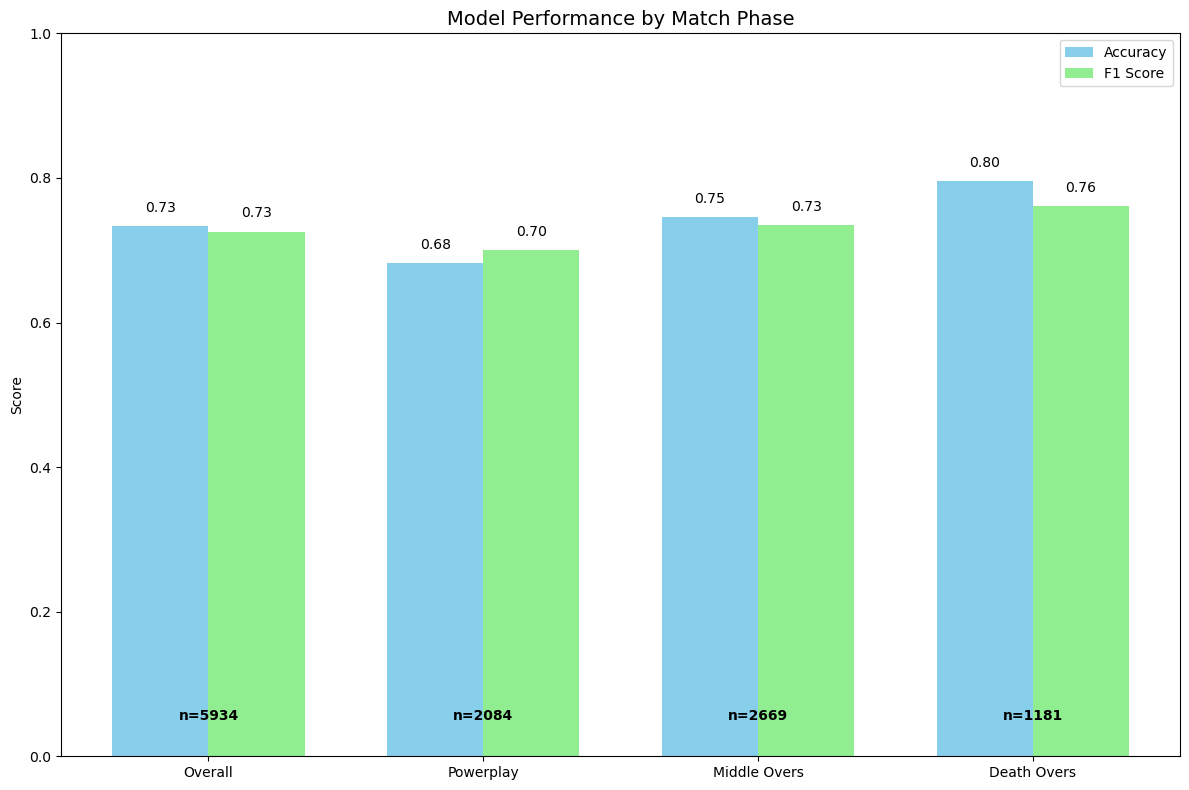

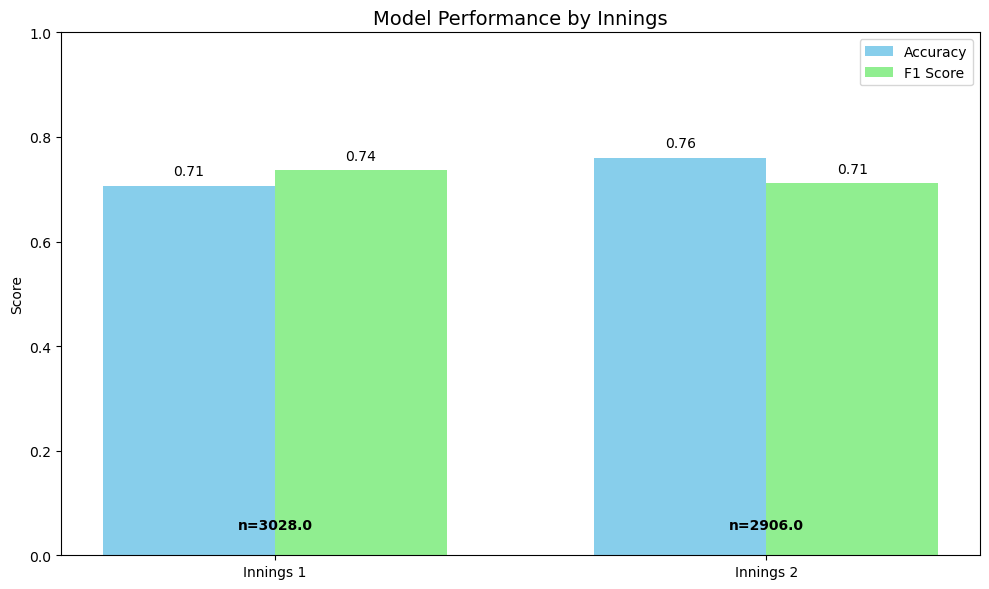

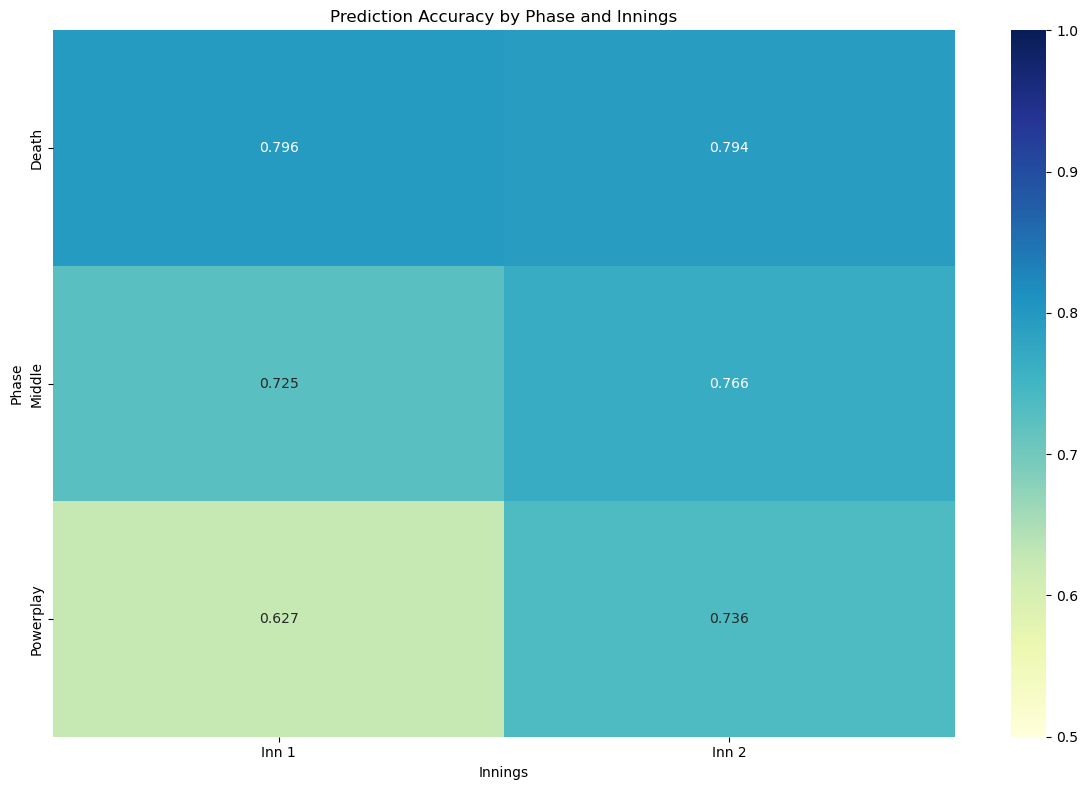

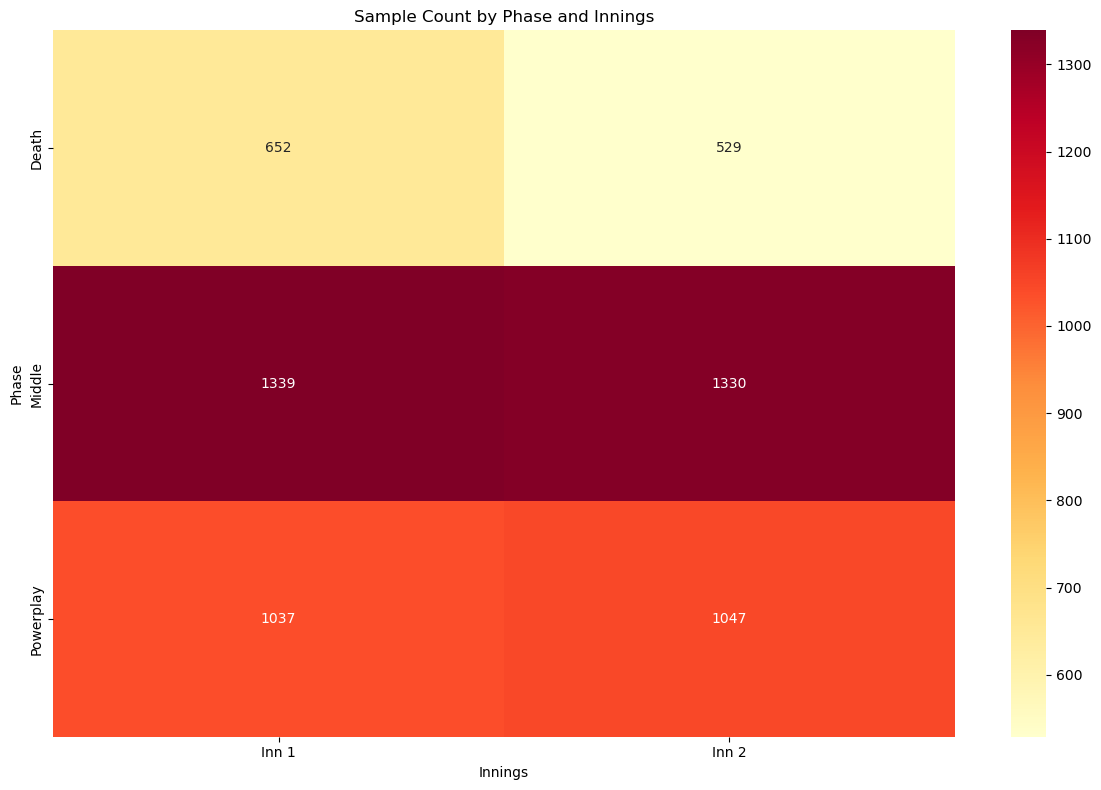

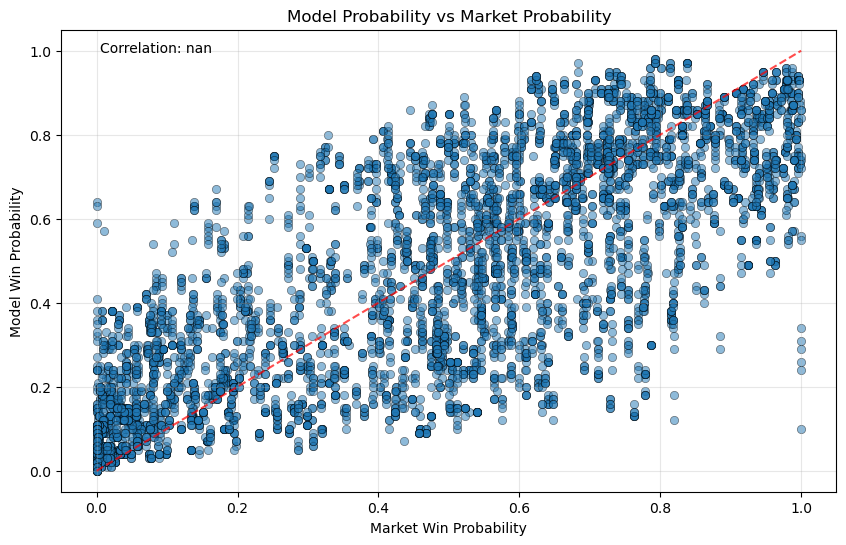

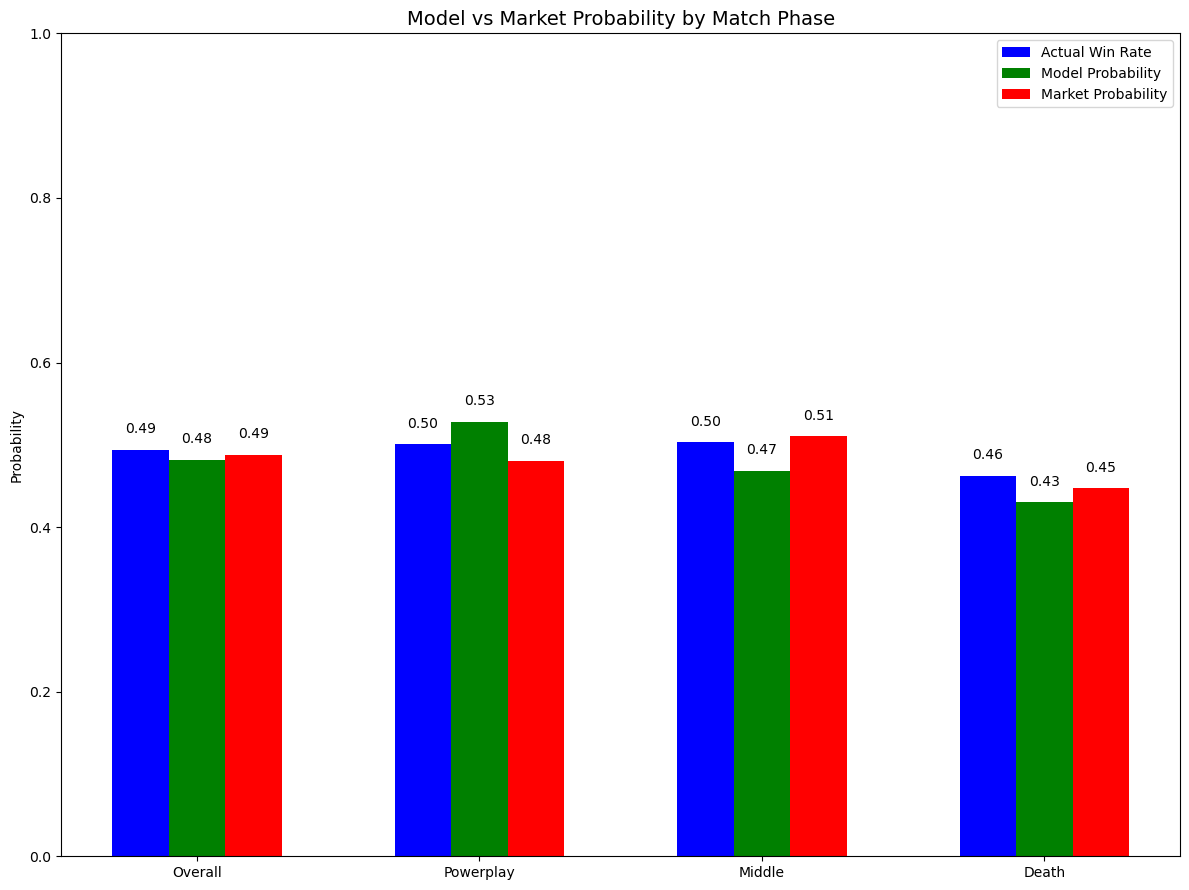

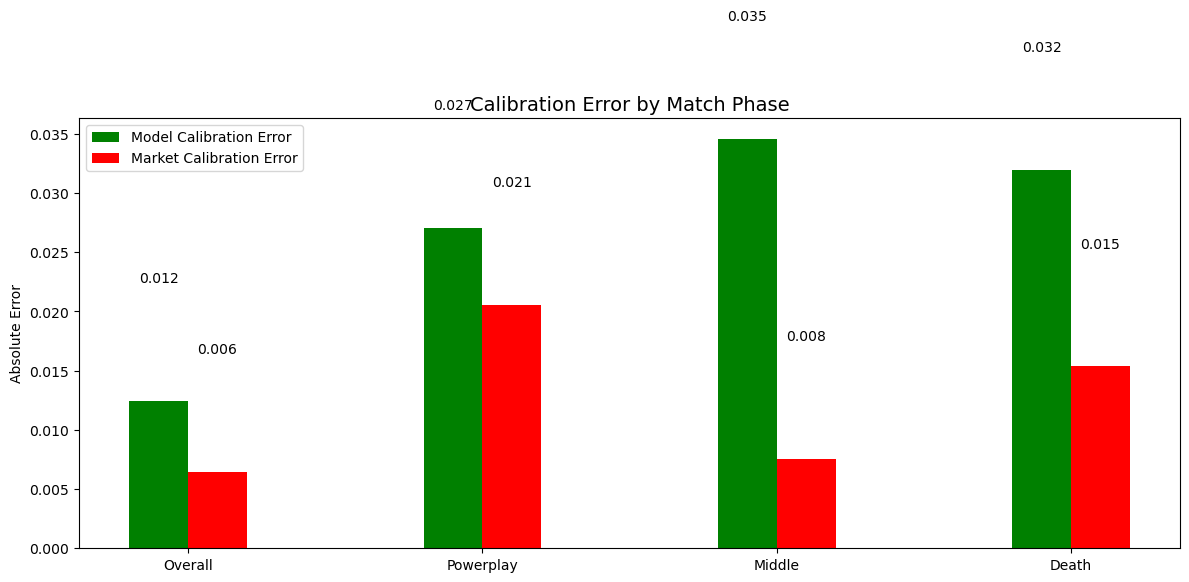

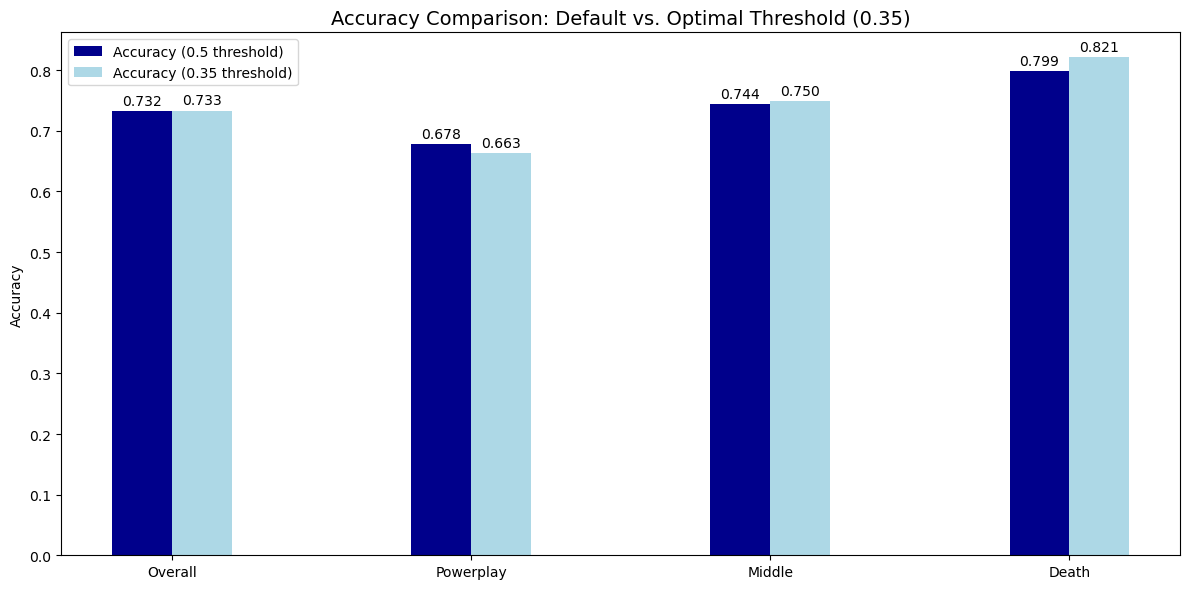

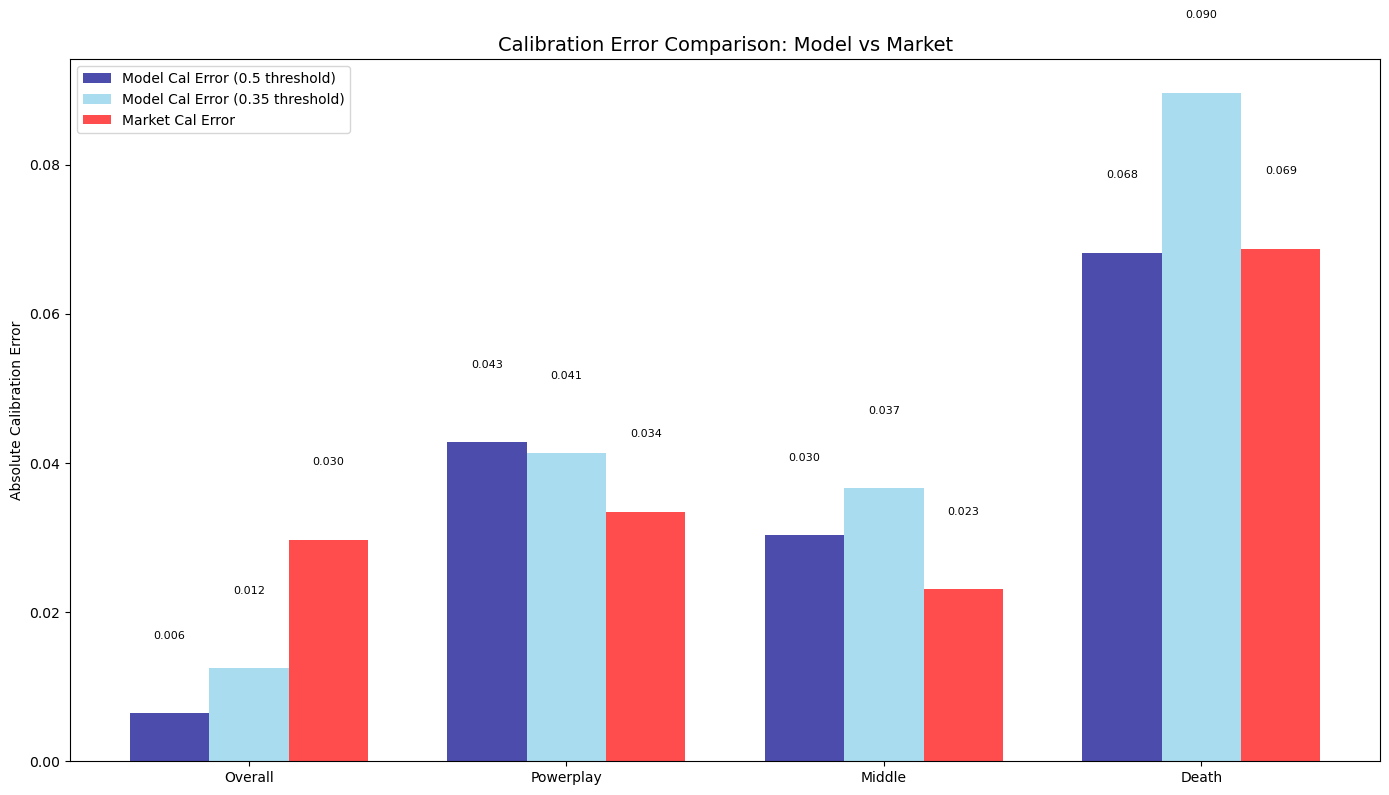

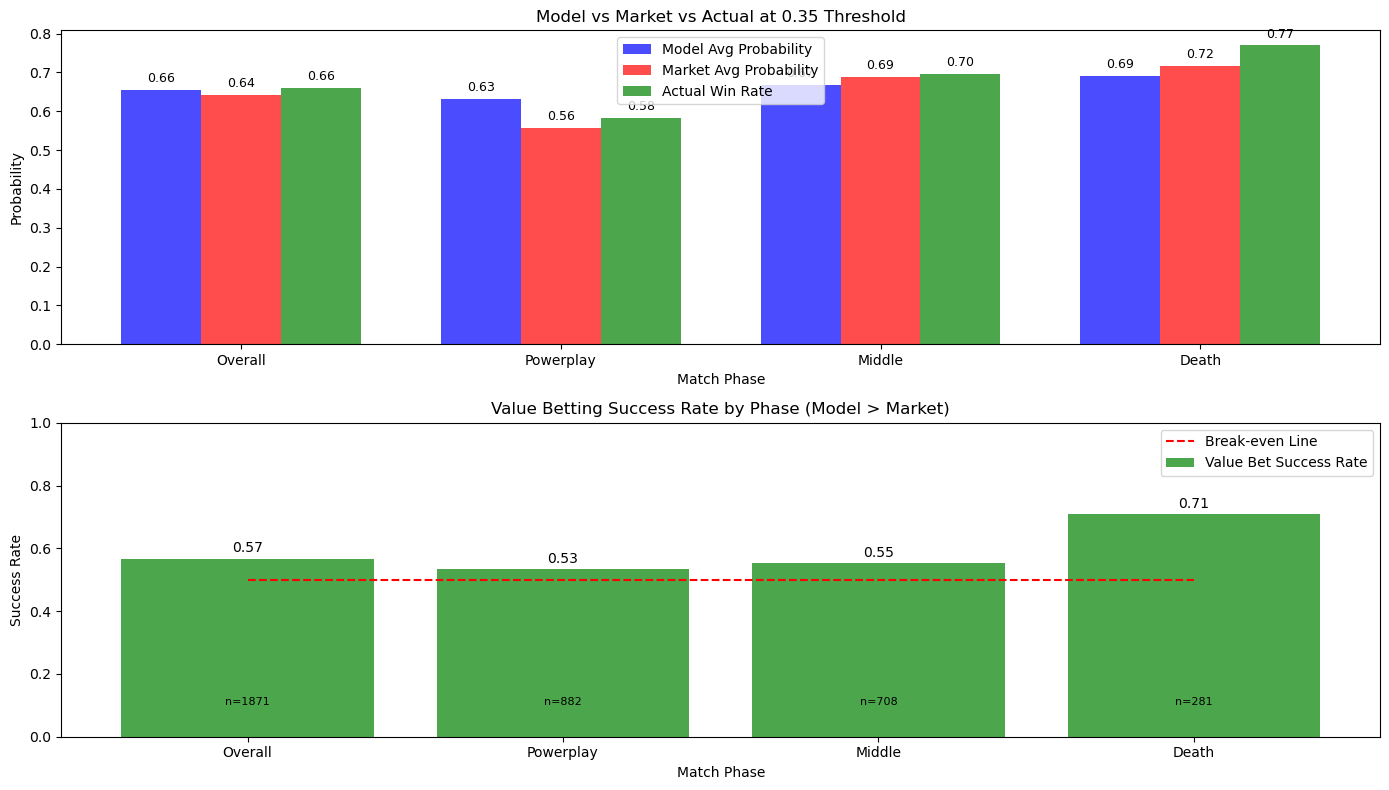

In [15]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import os

def analyze_match_phases():
    print("Starting match phase performance analysis...")
    
    # 1. Load prediction results
    try:
        predictions = pd.read_csv('prediction_results_with_teams.csv')
        print(f"Loaded prediction results with shape: {predictions.shape}")
        
        # Check if essential columns are present
        essential_cols = ['actual', 'predicted']
        missing = [col for col in essential_cols if col not in predictions.columns]
        
        if missing:
            # Try alternative column names
            alt_names = {
                'actual': ['actual_outcome', 'y_test', 'true'],
                'predicted': ['predicted_outcome', 'y_pred', 'prediction']
            }
            
            for col in missing:
                for alt in alt_names[col]:
                    if alt in predictions.columns:
                        predictions[col] = predictions[alt]
                        print(f"Using '{alt}' as '{col}'")
                        break
                        
            # Check again if columns are present
            missing = [col for col in essential_cols if col not in predictions.columns]
            if missing:
                raise ValueError(f"Missing essential columns: {missing}")
                
    except Exception as e:
        print(f"Error loading prediction results: {e}")
        try:
            # Try to create predictions dataframe from separate files
            y_test = pd.read_csv('y_test.csv').squeeze()
            
            # Try multiple possible filenames for predictions
            for pred_file in ['y_pred.csv', 'model_predictions.csv', 'predictions.csv']:
                if os.path.exists(pred_file):
                    y_pred = pd.read_csv(pred_file).squeeze()
                    predictions = pd.DataFrame({
                        'actual': y_test,
                        'predicted': y_pred
                    })
                    print(f"Created predictions from {pred_file}")
                    break
            else:
                raise FileNotFoundError("No prediction files found")
        except Exception as e2:
            print(f"Failed to create predictions from separate files: {e2}")
            return None
    
    # 2. Load match metadata (match_id, innings_num, over_number)
    try:
        # First try to load match IDs if not in predictions
        if 'match_id' not in predictions.columns:
            try:
                match_ids = pd.read_csv('test_match_ids.csv')
                print(f"Found {len(match_ids)} match IDs")
                
                if len(match_ids) == len(predictions):
                    predictions['match_id'] = match_ids['match_id'].values
                    print("Added match_id to predictions")
                else:
                    print(f"Warning: Match ID count ({len(match_ids)}) doesn't match predictions count ({len(predictions)})")
                    predictions['match_id'] = range(len(predictions))
            except Exception as e:
                print(f"Could not load match IDs: {e}")
                # Create placeholder match_ids
                predictions['match_id'] = range(len(predictions))
                print("Created placeholder match_ids")
        
        # Load X_test to get match details
        X_test = pd.read_csv('X_test.csv')
        print(f"Loaded X_test with shape {X_test.shape}")
        
        # Check for required columns
        phase_cols = ['over_number', 'innings_num']
        missing_phase_cols = [col for col in phase_cols if col not in X_test.columns]
        
        if missing_phase_cols:
            print(f"Warning: Missing phase columns in X_test: {missing_phase_cols}")
            # Look for substitute columns
            if 'over_number' not in X_test.columns:
                if 'over' in X_test.columns:
                    X_test['over_number'] = X_test['over']
                    print("Using 'over' as 'over_number'")
                else:
                    # Create a default over number
                    X_test['over_number'] = 10
                    print("WARNING: Created placeholder 'over_number' column")
            
            if 'innings_num' not in X_test.columns:
                if 'innings' in X_test.columns:
                    X_test['innings_num'] = X_test['innings']
                    print("Using 'innings' as 'innings_num'")
                else:
                    # Create a default innings
                    X_test['innings_num'] = 1
                    print("WARNING: Created placeholder 'innings_num' column")
        
        # 3. Merge predictions with match metadata
        print("\nMerging predictions with match metadata...")
        
        # If common match_id exists, use it for merging
        if 'match_id' in predictions.columns and 'match_id' in X_test.columns:
            merged = pd.merge(
                predictions,
                X_test[['match_id', 'innings_num', 'over_number']],
                on='match_id',
                how='inner'
            )
            print(f"Merged on match_id: {len(merged)} rows")
        else:
            # If no common match_id, assume rows are aligned
            print("No common match_id for merging - assuming aligned rows")
            
            # Make sure we don't go out of bounds
            max_rows = min(len(predictions), len(X_test))
            merged = predictions.iloc[:max_rows].copy()
            
            # Add required columns
            for col in ['over_number', 'innings_num']:
                if col in X_test.columns:
                    merged[col] = X_test[col].values[:max_rows]
            
            print(f"Created aligned dataframe with {len(merged)} rows")
    except Exception as e:
        print(f"Error loading or merging match metadata: {e}")
        return None
    
    # 4. Create match phase indicators
    print("\nCreating match phase indicators...")
    
    if 'over_number' in merged.columns:
        # Define cricket phases
        merged['powerplay'] = (merged['over_number'] <= 6).astype(int)
        merged['middle_overs'] = ((merged['over_number'] > 6) & (merged['over_number'] <= 15)).astype(int)
        merged['death_overs'] = (merged['over_number'] > 15).astype(int)
        
        # Create phase-specific dataframes
        powerplay_df = merged[merged['powerplay'] == 1]
        middle_df = merged[merged['middle_overs'] == 1]
        death_df = merged[merged['death_overs'] == 1]
        
        print(f"Phase breakdown: Powerplay ({len(powerplay_df)}), Middle overs ({len(middle_df)}), Death overs ({len(death_df)})")
    else:
        print("ERROR: Cannot create phase indicators - 'over_number' column is missing")
        return None
    
    # 5. Define evaluation function with better error handling
    def evaluate_by_group(df, group_cols, name=""):
        """
        Evaluate model performance grouped by specific columns
        Returns DataFrame with metrics per group
        """
        if len(df) == 0:
            print(f"No data for {name} evaluation")
            return pd.DataFrame()
        
        # Ensure required columns exist
        for col in group_cols + ['actual', 'predicted']:
            if col not in df.columns:
                print(f"Missing column '{col}' required for {name} evaluation")
                return pd.DataFrame()
        
        try:
            # Group performance by specified columns
            grouped = df.groupby(group_cols)
            metrics = []
            
            for name, group in grouped:
                if len(group) < 5:  # Skip groups with too few samples
                    continue
                
                # Calculate metrics for this group
                acc = accuracy_score(group['actual'], group['predicted'])
                f1 = f1_score(group['actual'], group['predicted'], zero_division=0)
                
                # Add to metrics list
                metrics.append({
                    **dict(zip(group_cols, name if isinstance(name, tuple) else [name])),
                    'accuracy': acc,
                    'f1_score': f1,
                    'count': len(group)
                })
            
            # Convert metrics to DataFrame
            metrics_df = pd.DataFrame(metrics)
            
            # Calculate overall metrics for this segment
            overall_acc = accuracy_score(df['actual'], df['predicted'])
            overall_f1 = f1_score(df['actual'], df['predicted'], zero_division=0)
            
            print(f"Overall {name} metrics: Accuracy={overall_acc:.4f}, F1 Score={overall_f1:.4f}, Count={len(df)}")
            
            return metrics_df
            
        except Exception as e:
            print(f"Error evaluating {name}: {e}")
            import traceback
            traceback.print_exc()
            return pd.DataFrame()
    
    # 6. Evaluate overall and phase-specific performance
    print("\nEvaluating performance by match, innings and phase...")
    
    # Overall performance
    overall_perf = evaluate_by_group(merged, ['match_id', 'innings_num'], "overall")
    
    # Phase-specific performance
    powerplay_perf = evaluate_by_group(powerplay_df, ['match_id', 'innings_num'], "powerplay")
    middle_perf = evaluate_by_group(middle_df, ['match_id', 'innings_num'], "middle overs")
    death_perf = evaluate_by_group(death_df, ['match_id', 'innings_num'], "death overs")
    
    # 7. Save detailed results
    try:
        print("\nSaving performance metrics to CSV files...")
        
        # Save per-match performance metrics
        if not overall_perf.empty:
            overall_perf.to_csv('performance_by_match.csv', index=False)
            
        # Save phase-specific metrics
        if not powerplay_perf.empty:
            powerplay_perf.to_csv('performance_powerplay.csv', index=False)
            
        if not middle_perf.empty:
            middle_perf.to_csv('performance_middle_overs.csv', index=False)
            
        if not death_perf.empty:
            death_perf.to_csv('performance_death_overs.csv', index=False)
        
        # Save the full merged data for further analysis
        merged.to_csv('predictions_with_phases.csv', index=False)
    except Exception as e:
        print(f"Error saving results: {e}")
    
    # 8. Create visualizations
    try:
        print("\nCreating performance visualizations...")
        
        # Calculate aggregate metrics by phase
        phase_summary = pd.DataFrame({
            'Phase': ['Overall', 'Powerplay', 'Middle Overs', 'Death Overs'],
            'Accuracy': [
                accuracy_score(merged['actual'], merged['predicted']),
                accuracy_score(powerplay_df['actual'], powerplay_df['predicted']) if len(powerplay_df) > 0 else 0,
                accuracy_score(middle_df['actual'], middle_df['predicted']) if len(middle_df) > 0 else 0,
                accuracy_score(death_df['actual'], death_df['predicted']) if len(death_df) > 0 else 0
            ],
            'F1 Score': [
                f1_score(merged['actual'], merged['predicted'], zero_division=0),
                f1_score(powerplay_df['actual'], powerplay_df['predicted'], zero_division=0) if len(powerplay_df) > 0 else 0,
                f1_score(middle_df['actual'], middle_df['predicted'], zero_division=0) if len(middle_df) > 0 else 0,
                f1_score(death_df['actual'], death_df['predicted'], zero_division=0) if len(death_df) > 0 else 0
            ],
            'Count': [
                len(merged),
                len(powerplay_df),
                len(middle_df),
                len(death_df)
            ]
        })
        
        # Create bar chart comparing phases
        plt.figure(figsize=(12, 8))
        
        # Plot accuracy and F1 score by phase
        ax = plt.subplot(111)
        bar_width = 0.35
        x = range(len(phase_summary))
        
        ax.bar([i - bar_width/2 for i in x], phase_summary['Accuracy'], width=bar_width, 
               color='skyblue', label='Accuracy')
        ax.bar([i + bar_width/2 for i in x], phase_summary['F1 Score'], width=bar_width, 
               color='lightgreen', label='F1 Score')
        
        # Add count on top of bars
        for i, (acc, f1, count) in enumerate(zip(phase_summary['Accuracy'], 
                                                phase_summary['F1 Score'],
                                                phase_summary['Count'])):
            plt.text(i - bar_width/2, acc + 0.02, f"{acc:.2f}", ha='center')
            plt.text(i + bar_width/2, f1 + 0.02, f"{f1:.2f}", ha='center')
            plt.text(i, 0.05, f"n={count}", ha='center', fontweight='bold')
        
        plt.xticks(x, phase_summary['Phase'])
        plt.ylim(0, 1.0)
        plt.title('Model Performance by Match Phase', fontsize=14)
        plt.ylabel('Score')
        plt.legend()
        plt.tight_layout()
        plt.savefig('performance_by_phase.png')
        print("Saved performance by phase visualization")
        
        # Create innings comparison plot
        if 'innings_num' in merged.columns:
            innings_summary = merged.groupby('innings_num').apply(
                lambda x: pd.Series({
                    'Accuracy': accuracy_score(x['actual'], x['predicted']),
                    'F1': f1_score(x['actual'], x['predicted'], zero_division=0),
                    'Count': len(x)
                })
            ).reset_index()
            
            plt.figure(figsize=(10, 6))
            
            # Plot accuracy and F1 score by innings
            ax = plt.subplot(111)
            bar_width = 0.35
            x = range(len(innings_summary))
            
            ax.bar([i - bar_width/2 for i in x], innings_summary['Accuracy'], width=bar_width, 
                   color='skyblue', label='Accuracy')
            ax.bar([i + bar_width/2 for i in x], innings_summary['F1'], width=bar_width, 
                   color='lightgreen', label='F1 Score')
            
            # Add count on top of bars
            for i, (acc, f1, count) in enumerate(zip(innings_summary['Accuracy'], 
                                                    innings_summary['F1'],
                                                    innings_summary['Count'])):
                plt.text(i - bar_width/2, acc + 0.02, f"{acc:.2f}", ha='center')
                plt.text(i + bar_width/2, f1 + 0.02, f"{f1:.2f}", ha='center')
                plt.text(i, 0.05, f"n={count}", ha='center', fontweight='bold')
            
            plt.xticks(x, [f"Innings {int(inn)}" for inn in innings_summary['innings_num']])
            plt.ylim(0, 1.0)
            plt.title('Model Performance by Innings', fontsize=14)
            plt.ylabel('Score')
            plt.legend()
            plt.tight_layout()
            plt.savefig('performance_by_innings.png')
            print("Saved performance by innings visualization")
        
        # Create a heatmap of performance by phase and innings
        plt.figure(figsize=(12, 8))
        
        # Prepare data for heatmap
        phase_innings_data = []
        
        # Iterate through each phase and innings
        for phase_name, phase_df in [
            ('Powerplay', powerplay_df), 
            ('Middle', middle_df), 
            ('Death', death_df)
        ]:
            if len(phase_df) == 0:
                continue
                
            for inn in sorted(phase_df['innings_num'].unique()):
                inn_df = phase_df[phase_df['innings_num'] == inn]
                if len(inn_df) < 5:  # Skip if too few samples
                    continue
                    
                phase_innings_data.append({
                    'Phase': phase_name,
                    'Innings': f"Inn {int(inn)}",
                    'Accuracy': accuracy_score(inn_df['actual'], inn_df['predicted']),
                    'Count': len(inn_df)
                })
        
        # Create DataFrame for heatmap
        if phase_innings_data:
            heatmap_df = pd.DataFrame(phase_innings_data)
            heatmap_pivot = heatmap_df.pivot(index='Phase', columns='Innings', values='Accuracy')
            
            sns.heatmap(heatmap_pivot, annot=True, cmap='YlGnBu', fmt='.3f', vmin=0.5, vmax=1.0)
            plt.title('Prediction Accuracy by Phase and Innings')
            plt.tight_layout()
            plt.savefig('accuracy_heatmap.png')
            print("Saved accuracy heatmap visualization")
            
            # Also save the count heatmap
            count_pivot = heatmap_df.pivot(index='Phase', columns='Innings', values='Count')
            
            plt.figure(figsize=(12, 8))
            sns.heatmap(count_pivot, annot=True, cmap='YlOrRd', fmt='d')
            plt.title('Sample Count by Phase and Innings')
            plt.tight_layout()
            plt.savefig('sample_count_heatmap.png')
            print("Saved sample count heatmap")
        else:
            print("Not enough data for phase-innings heatmap")
            
    except Exception as e:
        print(f"Error creating visualizations: {e}")
        import traceback
        traceback.print_exc()
        
    # 9. Model vs market analysis by phase
    if 'probability' in merged.columns and 'win_percentage' in merged.columns:
        print("\nPerforming model vs market analysis by phase...")
        
        # First ensure win percentage is in probability format (0-1)
        if merged['win_percentage'].mean() > 1:
            merged['win_percentage'] = merged['win_percentage'] / 100
        
        # Create market win probability column
        merged['market_win_probability'] = merged['win_percentage'].copy()
        
        # Properly calculate market probabilities based on one-hot encoded favored_team columns
        if 'batting_team' in merged.columns:

            def get_market_win_probability(row):
                batting_team = row['batting_team']
                favored_team_col = f'favored_team_{batting_team}'

                # If the batting team is favored, use win_percentage directly
                if favored_team_col in merged.columns and row[favored_team_col] == 1:
                    return row['win_percentage']
                else:
                    # If not favored or column missing, invert probability
                    return 1 - row['win_percentage']

            merged['market_win_probability'] = merged.apply(get_market_win_probability, axis=1)

        else:
            # Fallback: directly use win_percentage if no team info available
            merged['market_win_probability'] = merged['win_percentage']
            print("Warning: No batting_team column found - using win_percentage directly")
        
        # IMPORTANT: Recreate the phase dataframes to include the new column
        powerplay_df = merged[merged['powerplay'] == 1].copy()
        middle_df = merged[merged['middle_overs'] == 1].copy()
        death_df = merged[merged['death_overs'] == 1].copy()
        
        print(f"Re-created phase dataframes with market probabilities")
        
        # Create model vs market comparison
        plt.figure(figsize=(10, 6))
        plt.scatter(merged['market_win_probability'], merged['probability'], 
                alpha=0.5, edgecolor='k', linewidth=0.5)
        
        # Add diagonal reference line
        plt.plot([0, 1], [0, 1], 'r--', alpha=0.7)
        
        # Labels and title
        plt.xlabel('Market Win Probability')
        plt.ylabel('Model Win Probability')
        plt.title('Model Probability vs Market Probability')
        plt.grid(alpha=0.3)
        
        # Add correlation coefficient
        corr = np.corrcoef(merged['market_win_probability'], merged['probability'])[0, 1]
        plt.annotate(f"Correlation: {corr:.3f}", xy=(0.05, 0.95), xycoords='axes fraction')
        
        plt.savefig('model_vs_market_by_phase.png')
        print("Saved overall model vs market comparison")
        
        # Calculate calibration metrics for overall dataset
        model_avg_prob = merged['probability'].mean()
        market_avg_prob = merged['market_win_probability'].mean()
        actual_win_rate = merged['actual'].mean()
        
        print(f"\nOverall Calibration Analysis:")
        print(f"Actual win rate: {actual_win_rate:.4f}")
        print(f"Model average probability: {model_avg_prob:.4f}")
        print(f"Market average probability: {market_avg_prob:.4f}")
        print(f"Model calibration error: {abs(model_avg_prob - actual_win_rate):.4f}")
        print(f"Market calibration error: {abs(market_avg_prob - actual_win_rate):.4f}")
        
        # Phase-specific calibration analysis
        phase_market_data = []
        for phase_name, phase_df in [
            ('Overall', merged), 
            ('Powerplay', powerplay_df), 
            ('Middle', middle_df), 
            ('Death', death_df)
        ]:
            if len(phase_df) == 0:
                continue
                
            # Check required columns exist
            required_cols = ['probability', 'market_win_probability', 'actual']
            if not all(col in phase_df.columns for col in required_cols):
                print(f"Warning: Missing required columns in {phase_name} phase")
                missing = [col for col in required_cols if col not in phase_df.columns]
                print(f"Missing: {missing}")
                continue
                
            # Calculate metrics for this phase
            model_avg = phase_df['probability'].mean()
            market_avg = phase_df['market_win_probability'].mean()
            actual = phase_df['actual'].mean()
            
            # Use optimal threshold of 0.35 for predictions
            predicted_optimal = (phase_df['probability'] >= 0.42).astype(int)
            optimal_acc = accuracy_score(phase_df['actual'], predicted_optimal)
            default_acc = accuracy_score(phase_df['actual'], (phase_df['probability'] >= 0.5).astype(int))
            
            # Add to results
            phase_market_data.append({
                'Phase': phase_name,
                'Actual_Win_Rate': actual,
                'Model_Prob': model_avg,
                'Market_Prob': market_avg,
                'Model_Cal_Error': abs(model_avg - actual),
                'Market_Cal_Error': abs(market_avg - actual),
                'Model_Market_Diff': model_avg - market_avg,
                'Default_Accuracy': default_acc,
                'Optimal_Accuracy': optimal_acc,
                'Accuracy_Gain': optimal_acc - default_acc,
                'Sample_Count': len(phase_df)
            })
        
        # Create DataFrame and save
        if phase_market_data:
            phase_market_df = pd.DataFrame(phase_market_data)
            phase_market_df.to_csv('model_market_by_phase.csv', index=False)
            print("Saved phase-specific model vs market analysis")
            
            # Create visualization
            plt.figure(figsize=(12, 9))
            
            # Bar chart with model vs market by phase
            x = range(len(phase_market_df))
            bar_width = 0.2
            
            # Plot bars
            plt.bar([i - bar_width for i in x], phase_market_df['Actual_Win_Rate'], 
                    width=bar_width, color='blue', label='Actual Win Rate')
            plt.bar([i for i in x], phase_market_df['Model_Prob'], 
                    width=bar_width, color='green', label='Model Probability')
            plt.bar([i + bar_width for i in x], phase_market_df['Market_Prob'], 
                    width=bar_width, color='red', label='Market Probability')
            
            # Add text labels
            for i in x:
                plt.text(i - bar_width, phase_market_df['Actual_Win_Rate'].iloc[i] + 0.02, 
                        f"{phase_market_df['Actual_Win_Rate'].iloc[i]:.2f}", ha='center')
                plt.text(i, phase_market_df['Model_Prob'].iloc[i] + 0.02, 
                        f"{phase_market_df['Model_Prob'].iloc[i]:.2f}", ha='center')
                plt.text(i + bar_width, phase_market_df['Market_Prob'].iloc[i] + 0.02, 
                        f"{phase_market_df['Market_Prob'].iloc[i]:.2f}", ha='center')
            
            plt.xticks(x, phase_market_df['Phase'])
            plt.ylim(0, 1.0)
            plt.title('Model vs Market Probability by Match Phase', fontsize=14)
            plt.ylabel('Probability')
            plt.legend()
            plt.tight_layout()
            plt.savefig('model_vs_market_probabilities.png')
            print("Saved model vs market probabilities by phase visualization")
            
            # Create a second plot showing calibration error
            plt.figure(figsize=(12, 6))
            
            # Plot calibration errors
            plt.bar([i - bar_width/2 for i in x], phase_market_df['Model_Cal_Error'], 
                    width=bar_width, color='green', label='Model Calibration Error')
            plt.bar([i + bar_width/2 for i in x], phase_market_df['Market_Cal_Error'], 
                    width=bar_width, color='red', label='Market Calibration Error')
            
            for i in x:
                plt.text(i - bar_width/2, phase_market_df['Model_Cal_Error'].iloc[i] + 0.01, 
                        f"{phase_market_df['Model_Cal_Error'].iloc[i]:.3f}", ha='center')
                plt.text(i + bar_width/2, phase_market_df['Market_Cal_Error'].iloc[i] + 0.01, 
                        f"{phase_market_df['Market_Cal_Error'].iloc[i]:.3f}", ha='center')
                
            plt.xticks(x, phase_market_df['Phase'])
            plt.title('Calibration Error by Match Phase', fontsize=14)
            plt.ylabel('Absolute Error')
            plt.legend()
            plt.tight_layout()
            plt.savefig('calibration_error_by_phase.png')
            print("Saved calibration error by phase visualization")
            
            # Add the optimal threshold analysis visualization
            plt.figure(figsize=(12, 6))
            
            # Plot accuracy with different thresholds
            plt.bar([i - bar_width/2 for i in x], phase_market_df['Default_Accuracy'], 
                    width=bar_width, color='darkblue', label='Accuracy (0.5 threshold)')
            plt.bar([i + bar_width/2 for i in x], phase_market_df['Optimal_Accuracy'], 
                    width=bar_width, color='lightblue', label='Accuracy (0.35 threshold)')
            
            # Add text labels
            for i in x:
                plt.text(i - bar_width/2, phase_market_df['Default_Accuracy'].iloc[i] + 0.01, 
                        f"{phase_market_df['Default_Accuracy'].iloc[i]:.3f}", ha='center')
                plt.text(i + bar_width/2, phase_market_df['Optimal_Accuracy'].iloc[i] + 0.01, 
                        f"{phase_market_df['Optimal_Accuracy'].iloc[i]:.3f}", ha='center')
                
            plt.xticks(x, phase_market_df['Phase'])
            plt.title('Accuracy Comparison: Default vs. Optimal Threshold (0.35)', fontsize=14)
            plt.ylabel('Accuracy')
            plt.legend()
            plt.tight_layout()
            plt.savefig('threshold_comparison_by_phase.png')
            print("Saved threshold comparison by phase visualization")
            
            # Add calibration analysis with optimal threshold
        # Add calibration analysis with optimal threshold - include market comparison
        plt.figure(figsize=(14, 8))

        # Create data structure to hold calibration metrics with optimal threshold
        calibration_data = []

        for phase_name, phase_df in [
            ('Overall', merged), 
            ('Powerplay', powerplay_df), 
            ('Middle', middle_df), 
            ('Death', death_df)
        ]:
            if len(phase_df) == 0:
                continue
            
            # Get samples classified as wins with 0.35 threshold
            wins_035 = phase_df[phase_df['probability'] >= 0.42]
            if len(wins_035) > 0:
                avg_prob_035 = wins_035['probability'].mean()
                actual_rate_035 = wins_035['actual'].mean()
                cal_error_035 = abs(avg_prob_035 - actual_rate_035)
                
                # Get market probability for the same samples
                market_prob_035 = wins_035['market_win_probability'].mean()
                market_cal_error_035 = abs(market_prob_035 - actual_rate_035)
                
                # Get samples classified as wins with 0.5 threshold
                wins_05 = phase_df[phase_df['probability'] >= 0.5]
                if len(wins_05) > 0:
                    avg_prob_05 = wins_05['probability'].mean()
                    actual_rate_05 = wins_05['actual'].mean()
                    cal_error_05 = abs(avg_prob_05 - actual_rate_05)
                    
                    # Get market probability for the same samples
                    market_prob_05 = wins_05['market_win_probability'].mean()
                    market_cal_error_05 = abs(market_prob_05 - actual_rate_05)
                else:
                    avg_prob_05 = 0
                    actual_rate_05 = 0
                    cal_error_05 = 0
                    market_prob_05 = 0
                    market_cal_error_05 = 0
                
                calibration_data.append({
                    'Phase': phase_name,
                    'Avg_Prob_0.35': avg_prob_035,
                    'Actual_Rate_0.35': actual_rate_035,
                    'Cal_Error_0.35': cal_error_035,
                    'Avg_Prob_0.5': avg_prob_05,
                    'Actual_Rate_0.5': actual_rate_05,
                    'Cal_Error_0.5': cal_error_05,
                    'Market_Prob_0.35': market_prob_035,
                    'Market_Cal_Error_0.35': market_cal_error_035,
                    'Market_Prob_0.5': market_prob_05,
                    'Market_Cal_Error_0.5': market_cal_error_05,
                    'Cal_Error_Diff': cal_error_05 - cal_error_035,
                    'Market_Model_Diff_0.35': market_cal_error_035 - cal_error_035,
                    'Count_0.35': len(wins_035),
                    'Count_0.5': len(wins_05) if len(wins_05) > 0 else 0
                })

        if calibration_data:
            cal_df = pd.DataFrame(calibration_data)
            cal_df.to_csv('threshold_calibration_analysis.csv', index=False)
            
            # Create multi-bar chart comparing calibration errors
            x = range(len(cal_df))
            bar_width = 0.25  # Narrower bars to fit three categories
            
            plt.bar([i - bar_width for i in x], cal_df['Cal_Error_0.5'], width=bar_width,
                    label='Model Cal Error (0.5 threshold)', color='darkblue', alpha=0.7)
            plt.bar([i for i in x], cal_df['Cal_Error_0.35'], width=bar_width,
                    label='Model Cal Error (0.35 threshold)', color='skyblue', alpha=0.7)
            plt.bar([i + bar_width for i in x], cal_df['Market_Cal_Error_0.35'], width=bar_width,
                    label='Market Cal Error', color='red', alpha=0.7)
            
            # Add labels
            for i in x:
                plt.text(i - bar_width, cal_df['Cal_Error_0.5'].iloc[i] + 0.01, 
                        f"{cal_df['Cal_Error_0.5'].iloc[i]:.3f}", ha='center', fontsize=8)
                plt.text(i, cal_df['Cal_Error_0.35'].iloc[i] + 0.01, 
                        f"{cal_df['Cal_Error_0.35'].iloc[i]:.3f}", ha='center', fontsize=8)
                plt.text(i + bar_width, cal_df['Market_Cal_Error_0.35'].iloc[i] + 0.01, 
                        f"{cal_df['Market_Cal_Error_0.35'].iloc[i]:.3f}", ha='center', fontsize=8)
            
            plt.xticks(x, cal_df['Phase'])
            plt.title('Calibration Error Comparison: Model vs Market', fontsize=14)
            plt.ylabel('Absolute Calibration Error')
            plt.legend()
            plt.tight_layout()
            plt.savefig('calibration_by_threshold_with_market.png')
            print("Saved calibration analysis by threshold with market comparison")
            
            # Print calibration summary
            print("\nCalibration Analysis with Different Thresholds:")
            for i, phase in enumerate(cal_df['Phase']):
                print(f"\n{phase}:")
                print(f"  0.5 threshold: Avg Prob={cal_df['Avg_Prob_0.5'].iloc[i]:.3f}, " 
                    f"Actual Rate={cal_df['Actual_Rate_0.5'].iloc[i]:.3f}, "
                    f"Error={cal_df['Cal_Error_0.5'].iloc[i]:.3f}")
                print(f"  0.35 threshold: Avg Prob={cal_df['Avg_Prob_0.35'].iloc[i]:.3f}, "
                    f"Actual Rate={cal_df['Actual_Rate_0.35'].iloc[i]:.3f}, "
                    f"Error={cal_df['Cal_Error_0.35'].iloc[i]:.3f}")
                print(f"  Market: Avg Prob={cal_df['Market_Prob_0.35'].iloc[i]:.3f}, "
                    f"Actual Rate={cal_df['Actual_Rate_0.35'].iloc[i]:.3f}, "
                    f"Error={cal_df['Market_Cal_Error_0.35'].iloc[i]:.3f}")
                
                # Model threshold comparison
                if cal_df['Cal_Error_0.35'].iloc[i] < cal_df['Cal_Error_0.5'].iloc[i]:
                    print(f"  → 0.35 threshold improves model calibration by "
                        f"{(cal_df['Cal_Error_0.5'].iloc[i] - cal_df['Cal_Error_0.35'].iloc[i])*100:.2f}%")
                else:
                    print(f"  → 0.5 threshold is better calibrated by "
                        f"{(cal_df['Cal_Error_0.35'].iloc[i] - cal_df['Cal_Error_0.5'].iloc[i])*100:.2f}%")
                
                # Model vs market comparison
                if cal_df['Cal_Error_0.35'].iloc[i] < cal_df['Market_Cal_Error_0.35'].iloc[i]:
                    print(f"  → Model at 0.35 threshold is better calibrated than market by "
                        f"{(cal_df['Market_Cal_Error_0.35'].iloc[i] - cal_df['Cal_Error_0.35'].iloc[i])*100:.2f}%")
                else:
                    print(f"  → Market is better calibrated than model by "
                        f"{(cal_df['Cal_Error_0.35'].iloc[i] - cal_df['Market_Cal_Error_0.35'].iloc[i])*100:.2f}%")
                    
        # Model vs Market analysis specifically at the 0.35 threshold
        print("\nAnalyzing model vs market probabilities at optimal 0.35 threshold...")

        # Create a figure for value betting analysis
        plt.figure(figsize=(14, 8))

        # Track value betting opportunities by phase
        value_betting_data = []

        for phase_name, phase_df in [
            ('Overall', merged), 
            ('Powerplay', powerplay_df), 
            ('Middle', middle_df), 
            ('Death', death_df)
        ]:
            if len(phase_df) == 0 or len(phase_df) < 10:  # Skip phases with too little data
                continue
            
            # Get only predictions where model probability is >= 0.35 (model predicts win)
            threshold_df = phase_df[phase_df['probability'] >= 0.35].copy()
            
            if len(threshold_df) < 5:  # Skip if too few samples meet threshold
                continue
            
            # Calculate key metrics
            model_avg = threshold_df['probability'].mean()
            market_avg = threshold_df['market_win_probability'].mean()
            actual_win_rate = threshold_df['actual'].mean()
            
            # Calculate value opportunities (where model prob > market prob)
            threshold_df['value_opportunity'] = (threshold_df['probability'] > threshold_df['market_win_probability']).astype(int)
            threshold_df['value_diff'] = threshold_df['probability'] - threshold_df['market_win_probability']
            threshold_df['value_outcome'] = threshold_df['value_opportunity'] & threshold_df['actual']
            
            # Value betting metrics
            value_opportunities = threshold_df['value_opportunity'].sum()
            value_success_rate = threshold_df['value_outcome'].sum() / value_opportunities if value_opportunities > 0 else 0
            avg_value_diff = threshold_df[threshold_df['value_opportunity'] == 1]['value_diff'].mean() if value_opportunities > 0 else 0
            
            value_betting_data.append({
                'Phase': phase_name,
                'Model_Avg': model_avg,
                'Market_Avg': market_avg,
                'Actual_Win_Rate': actual_win_rate,
                'Total_Bets': len(threshold_df),
                'Value_Opportunities': value_opportunities,
                'Value_Success_Rate': value_success_rate,
                'Avg_Value_Diff': avg_value_diff,
                'PnL': value_success_rate - (1 - value_success_rate)  # Simple profit calculation assuming even odds
            })

        # Create DataFrame from value betting data
        if value_betting_data:
            value_df = pd.DataFrame(value_betting_data)
            value_df.to_csv('value_betting_analysis_035_threshold.csv', index=False)
            
            # Create visualization for value betting opportunities
            x = range(len(value_df))
            
            # Multi-bar plot with probabilities
            plt.subplot(2, 1, 1)
            bar_width = 0.25
            plt.bar([i - bar_width for i in x], value_df['Model_Avg'], width=bar_width, 
                color='blue', alpha=0.7, label='Model Avg Probability')
            plt.bar([i for i in x], value_df['Market_Avg'], width=bar_width, 
                color='red', alpha=0.7, label='Market Avg Probability')
            plt.bar([i + bar_width for i in x], value_df['Actual_Win_Rate'], width=bar_width, 
                color='green', alpha=0.7, label='Actual Win Rate')
            
            # Add labels
            for i in x:
                plt.text(i - bar_width, value_df['Model_Avg'].iloc[i] + 0.02, 
                        f"{value_df['Model_Avg'].iloc[i]:.2f}", ha='center', fontsize=9)
                plt.text(i, value_df['Market_Avg'].iloc[i] + 0.02, 
                        f"{value_df['Market_Avg'].iloc[i]:.2f}", ha='center', fontsize=9)
                plt.text(i + bar_width, value_df['Actual_Win_Rate'].iloc[i] + 0.02, 
                        f"{value_df['Actual_Win_Rate'].iloc[i]:.2f}", ha='center', fontsize=9)
            
            plt.xlabel('Match Phase')
            plt.ylabel('Probability')
            plt.title('Model vs Market vs Actual at 0.35 Threshold')
            plt.xticks(x, value_df['Phase'])
            plt.legend()
            
            # Value betting analysis subplot
            plt.subplot(2, 1, 2)
            plt.bar(x, value_df['Value_Success_Rate'], color='green', alpha=0.7, 
                label='Value Bet Success Rate')
            plt.plot(x, [0.5] * len(x), 'r--', label='Break-even Line')
            
            # Add annotations
            for i in x:
                plt.text(i, value_df['Value_Success_Rate'].iloc[i] + 0.02, 
                        f"{value_df['Value_Success_Rate'].iloc[i]:.2f}", ha='center')
                plt.text(i, 0.1, 
                        f"n={value_df['Value_Opportunities'].iloc[i]}", ha='center', fontsize=8)
            
            plt.xlabel('Match Phase')
            plt.ylabel('Success Rate')
            plt.title('Value Betting Success Rate by Phase (Model > Market)')
            plt.xticks(x, value_df['Phase'])
            plt.ylim(0, 1.0)
            plt.legend()
            
            plt.tight_layout()
            plt.savefig('value_betting_analysis_035.png')
            print("Saved value betting analysis at 0.35 threshold")
            
            # Print summary
            print("\nValue Betting Analysis at 0.35 Threshold:")
            for i, phase in enumerate(value_df['Phase']):
                profit = "PROFITABLE" if value_df['PnL'].iloc[i] > 0 else "UNPROFITABLE"
                edge = value_df['Value_Success_Rate'].iloc[i] - 0.5  # Edge over 50% break-even
                
                print(f"\n{phase}:")
                print(f"  Total bets: {value_df['Total_Bets'].iloc[i]}")
                print(f"  Value opportunities: {value_df['Value_Opportunities'].iloc[i]} "
                    f"({value_df['Value_Opportunities'].iloc[i]/value_df['Total_Bets'].iloc[i]*100:.1f}% of bets)")
                print(f"  Value success rate: {value_df['Value_Success_Rate'].iloc[i]:.3f}")
                print(f"  Average edge: {edge*100:.2f}% over break-even")
                print(f"  Status: {profit} with {abs(value_df['PnL'].iloc[i])*100:.2f}% ROI")        
                    
    
    print("\nAnalysis complete! Results saved to CSV files and visualizations.")
    return {
        'merged_data': merged,
        'phase_summary': phase_summary if 'phase_summary' in locals() else None,
        'overall_perf': overall_perf,
        'powerplay_perf': powerplay_perf,
        'middle_perf': middle_perf,
        'death_perf': death_perf
    }

# Run the analysis
if __name__ == "__main__":
    results = analyze_match_phases()